# **Modelo LSTM**
#### **Curso:** Inteligencia de Negocios (Tema: Redes Neuronales)
#### **Docente:**  Mg. Ernesto D. Cancho Rodríguez


### Importamos Librerías

In [1]:
import matplotlib.pyplot as plt  # Importación de la biblioteca matplotlib.pyplot para graficar datos
import pandas as pd  # Importación de la biblioteca pandas para manipulación de datos en forma de DataFrame
import numpy as np  # Importación de la biblioteca numpy para operaciones numéricas

In [2]:
from datetime import datetime
import seaborn as sns

from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
pd.Timestamp.today().strftime('%Y-%m-%d %H:%M:%S') # Se capta la fecha y hora actual

'2023-06-27 18:06:11'

In [4]:
# Descargamos una librería externa
# !pip install yfinance

In [5]:
#Importamos la librería nueva
import yfinance as yf

In [6]:
# Set start and end dates for the price data
fechaInicio = '2018-01-01'  # Se establece la fecha de inicio para los datos de precios
fechaFin = '2022-12-31'  # Se establece la fecha de fin para los datos de precios

# **SECCION EMPRESAS MINERAS:**

### Carga de datos Minera Buenaventura

In [7]:
BVN_df = yf.download('BVN', start = fechaInicio, end = fechaFin)
#Añadimos la terminación _BVN a cada columna
BVN_df.columns += "_BVN"
BVN_df

[*********************100%***********************]  1 of 1 completed


Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN
Date                                                                         
2018-01-02     14.16     14.54    13.99      14.52      14.124079     1643300
2018-01-03     14.53     14.89    14.35      14.62      14.221352     1606700
2018-01-04     14.66     15.12    14.56      15.02      14.610446     1845400
2018-01-05     14.95     15.15    14.81      14.84      14.435353     1037400
2018-01-08     14.83     14.84    14.28      14.35      13.958715     1286100
...              ...       ...      ...        ...            ...         ...
2022-12-23      7.55      7.59     7.36       7.44       7.371337      447000
2022-12-27      7.51      7.85     7.44       7.66       7.589307      624400
2022-12-28      7.61      7.64     7.34       7.51       7.440692      911700
2022-12-29      7.59      7.66     7.44       7.54       7.470415      631700
2022-12-30      7.54      7.59     7.36       7.45       7.381245      356200

[1259 rows x 6 columns]

In [8]:
BVN_df.shape

(1259, 6)

### Carga de datos Barrick Gold Corporation:

In [9]:
# Retrieve the  price data from Yahoo Finance
T02_ABX = yf.download('ABX.TO', start=fechaInicio, end=fechaFin)
# Remove the 'Volume' column
T02_ABX.drop('Volume', axis=1, inplace=True)

# Add prefix to column names
T02_ABX.columns = ['ABX.TO_' + column for column in T02_ABX.columns]

# Se obtienen los datos de precios de Bitcoin de Yahoo Finance
T02_ABX

[*********************100%***********************]  1 of 1 completed


ABX.TO_Open  ABX.TO_High  ABX.TO_Low  ABX.TO_Close  \
Date                                                             
2018-01-02    18.320000    19.049999   18.320000     19.010000   
2018-01-03    19.080000    19.129999   18.510000     18.809999   
2018-01-04    18.809999    18.840000   18.530001     18.790001   
2018-01-05    18.600000    18.600000   18.420000     18.549999   
2018-01-08    18.490000    18.590000   18.190001     18.290001   
...                 ...          ...         ...           ...   
2022-12-22    23.480000    23.719999   23.209999     23.580000   
2022-12-23    23.670000    23.780001   23.280001     23.610001   
2022-12-28    23.799999    23.850000   23.270000     23.420000   
2022-12-29    23.540001    23.670000   23.320000     23.340000   
2022-12-30    23.440001    23.459999   23.070000     23.209999   

            ABX.TO_Adj Close  
Date                          
2018-01-02         17.186550  
2018-01-03         17.005732  
2018-01-04         16.987654  
2018-01-05         16.770676  
2018-01-08         16.535614  
...                      ...  
2022-12-22         23.580000  
2022-12-23         23.610001  
2022-12-28         23.420000  
2022-12-29         23.340000  
2022-12-30         23.209999  

[1255 rows x 5 columns]

### Carga de datos BHP Billiton Limited:

In [10]:
# Retrieve the  price data from Yahoo Finance
T03_BHP = yf.download('BHP', start=fechaInicio, end=fechaFin)
# Remove the 'Volume' column
T03_BHP.drop('Volume', axis=1, inplace=True)

# Add prefix to column names
T03_BHP.columns = ['BHP_' + column for column in T03_BHP.columns]

# Se obtienen los datos de precios de Bitcoin de Yahoo Finance
T03_BHP


[*********************100%***********************]  1 of 1 completed


BHP_Open   BHP_High    BHP_Low  BHP_Close  BHP_Adj Close
Date                                                                 
2018-01-02  41.703835  42.399643  41.587868  42.390724      32.677608
2018-01-03  42.515610  42.640499  42.176628  42.560215      32.808258
2018-01-04  42.774307  42.899197  42.578056  42.640499      32.870152
2018-01-05  42.694023  42.952721  42.479931  42.943802      33.103954
2018-01-08  43.273865  43.345226  43.131134  43.264942      33.351509
...               ...        ...        ...        ...            ...
2022-12-23  62.029999  62.139999  61.330002  62.049999      62.049999
2022-12-27  62.689999  63.090000  62.400002  62.740002      62.740002
2022-12-28  62.869999  62.930000  61.639999  61.740002      61.740002
2022-12-29  62.000000  62.459999  61.959999  62.240002      62.240002
2022-12-30  62.000000  62.430000  61.639999  62.049999      62.049999

[1259 rows x 5 columns]

### Carga de datos Fortuna Silver Mines:

In [11]:
# Retrieve the  price data from Yahoo Finance
T04_FSM = yf.download('FSM', start=fechaInicio, end=fechaFin)
# Remove the 'Volume' column
T04_FSM.drop(['Volume', 'Close'], axis=1, inplace=True)

# Add prefix to column names
T04_FSM.columns = ['FSM_' + column for column in T04_FSM.columns]

# Se obtienen los datos de precios de Bitcoin de Yahoo Finance
print(T04_FSM.shape)
# print(T03_BHP.dtypes)
T04_FSM

[*********************100%***********************]  1 of 1 completed
(1259, 4)


FSM_Open  FSM_High  FSM_Low  FSM_Adj Close
Date                                                  
2018-01-02      5.31      5.34     5.20           5.33
2018-01-03      5.31      5.32     4.97           5.10
2018-01-04      5.11      5.15     5.00           5.14
2018-01-05      5.11      5.18     5.04           5.09
2018-01-08      5.14      5.20     5.02           5.07
...              ...       ...      ...            ...
2022-12-23      3.83      3.88     3.73           3.84
2022-12-27      3.86      4.07     3.84           3.96
2022-12-28      3.91      3.92     3.77           3.80
2022-12-29      3.84      3.88     3.77           3.77
2022-12-30      3.79      3.79     3.71           3.75

[1259 rows x 4 columns]

### Carga de datos Minera Southern Copper:

In [12]:
# Retrieve the  price data from Yahoo Finance
T05_SCCO = yf.download('SCCO', start=fechaInicio, end=fechaFin)
# Remove the 'Volume' column
T05_SCCO.drop('Volume', axis=1, inplace=True)

# Add prefix to column names
T05_SCCO.columns = ['SCCO_' + column for column in T05_SCCO.columns]

# Se obtienen los datos de precios de Bitcoin de Yahoo Finance
print(T05_SCCO.shape)
# print(T03_BHP.dtypes)
T05_SCCO

[*********************100%***********************]  1 of 1 completed
(1259, 5)


SCCO_Open  SCCO_High   SCCO_Low  SCCO_Close  SCCO_Adj Close
Date                                                                   
2018-01-02  47.939999  48.900002  47.939999   48.900002       37.578949
2018-01-03  48.799999  49.060001  48.340000   48.990002       37.648113
2018-01-04  49.220001  49.349998  48.730000   48.740002       37.455990
2018-01-05  48.619999  49.349998  48.500000   49.119999       37.748013
2018-01-08  49.209999  49.459999  48.990002   49.349998       37.924763
...               ...        ...        ...         ...             ...
2022-12-23  61.169998  61.459999  60.490002   61.060001       59.469883
2022-12-27  61.919998  62.340000  61.509998   62.180000       60.560715
2022-12-28  62.009998  62.349998  60.950001   61.060001       59.469883
2022-12-29  61.389999  61.990002  61.070000   61.790001       60.180874
2022-12-30  61.430000  61.790001  60.200001   60.389999       58.817329

[1259 rows x 5 columns]

### Inputs adicionales para Predicción

#### Mercado de Commodities

##### Datos de GLD (ORO)

In [13]:
GLD_data = yf.download('GLD', start = fechaInicio, end = fechaFin)

# Remove the 'Volume' column
GLD_data.drop( 'Adj Close' , axis=1, inplace=True)

GLD_data.columns += "_GLD"
GLD_data

[*********************100%***********************]  1 of 1 completed


Open_GLD    High_GLD     Low_GLD   Close_GLD  Volume_GLD
Date                                                                  
2018-01-02  124.660004  125.180000  124.389999  125.150002    11762500
2018-01-03  125.050003  125.089996  124.099998  124.820000     7904300
2018-01-04  124.889999  125.849998  124.739998  125.459999     7329700
2018-01-05  124.930000  125.480003  124.830002  125.330002     5739900
2018-01-08  125.199997  125.320000  124.900002  125.309998     3566700
...                ...         ...         ...         ...         ...
2022-12-23  166.880005  167.800003  166.660004  167.259995     2912300
2022-12-27  167.889999  170.610001  167.800003  168.669998     6885700
2022-12-28  168.050003  168.339996  167.100006  167.910004     3662500
2022-12-29  168.539993  169.350006  168.520004  168.850006     3345900
2022-12-30  169.259995  169.899994  168.800003  169.639999     2864500

[1259 rows x 5 columns]

##### Datos de SLV (Plata)

In [14]:
SLV_data = yf.download('SLV', start = fechaInicio, end = fechaFin)

# Remove the 'Volume' column
SLV_data.drop( 'Adj Close' , axis=1, inplace=True)

SLV_data.columns += "_SLV"
SLV_data

[*********************100%***********************]  1 of 1 completed


Open_SLV   High_SLV    Low_SLV  Close_SLV  Volume_SLV
Date                                                              
2018-01-02  16.129999  16.230000  16.120001  16.209999     8943200
2018-01-03  16.190001  16.260000  16.090000  16.170000     9149500
2018-01-04  16.209999  16.299999  16.190001  16.230000     7466300
2018-01-05  16.180000  16.290001  16.160000  16.219999     5651500
2018-01-08  16.170000  16.190001  16.070000  16.150000     6707000
...               ...        ...        ...        ...         ...
2022-12-23  21.780001  21.950001  21.690001  21.850000    10922300
2022-12-27  21.959999  22.350000  21.920000  22.110001    12346900
2022-12-28  21.930000  21.969999  21.600000  21.600000    10915100
2022-12-29  22.059999  22.139999  21.950001  21.969999    11896400
2022-12-30  21.920000  22.030001  21.639999  22.020000    14251000

[1259 rows x 5 columns]

##### Datos de COPX (Cobre)

In [15]:
COPX_data = yf.download('COPX', start = fechaInicio, end = fechaFin)
COPX_data.columns += "_COPX"
COPX_data

[*********************100%***********************]  1 of 1 completed


Open_COPX  High_COPX   Low_COPX  Close_COPX  Adj Close_COPX  \
Date                                                                      
2018-01-02  27.750000  28.129999  27.580000   28.049999       25.326067   
2018-01-03  28.150000  28.150000  27.620001   27.760000       25.064228   
2018-01-04  28.150000  28.309999  28.059999   28.200001       25.461500   
2018-01-05  28.240000  28.330000  28.100000   28.299999       25.551788   
2018-01-08  28.430000  28.510000  28.299999   28.480000       25.714308   
...               ...        ...        ...         ...             ...   
2022-12-23  35.639999  36.040001  35.290001   36.029999       35.635220   
2022-12-27  36.500000  36.799999  36.330002   36.480000       36.080288   
2022-12-28  36.689999  36.810001  36.009998   36.049999       35.654999   
2022-12-29  36.049999  36.230000  35.790001   36.020000       36.020000   
2022-12-30  35.820000  35.990002  35.400002   35.430000       35.430000   

            Volume_COPX  
Date                     
2018-01-02        91300  
2018-01-03       272600  
2018-01-04        57300  
2018-01-05        72600  
2018-01-08        61900  
...                 ...  
2022-12-23       185000  
2022-12-27       335700  
2022-12-28       605100  
2022-12-29       173900  
2022-12-30       125600  

[1259 rows x 6 columns]

##### Datos de ZINC.L (Zinc):

In [16]:
# Retrieve the  price data from Yahoo Finance
T09_ZINC = yf.download('ZINC.L', start=fechaInicio, end=fechaFin)
# Remove the 'Volume' column
T09_ZINC.drop( 'Close' , axis=1, inplace=True)

# Add prefix to column names
T09_ZINC.columns = ['ZINC.L_' + column for column in T09_ZINC.columns]

# Se obtienen los datos de precios de Bitcoin de Yahoo Finance
print(T09_ZINC.shape)
# print(T03_BHP.dtypes)
T09_ZINC.head(5)

[*********************100%***********************]  1 of 1 completed
(1263, 5)


ZINC.L_Open  ZINC.L_High  ZINC.L_Low  ZINC.L_Adj Close  \
Date                                                                 
2018-01-02         9.59         9.69        9.59              9.67   
2018-01-03         9.70         9.70        9.60              9.62   
2018-01-04         9.65         9.67        9.65              9.69   
2018-01-05         9.69         9.69        9.69              9.69   
2018-01-08         9.74         9.75        9.74              9.78   

            ZINC.L_Volume  
Date                       
2018-01-02          50552  
2018-01-03           4102  
2018-01-04           1967  
2018-01-05              0  
2018-01-08            250

##### Datos BZ_F: Brent Crude Oil Last Day Finance (BZ=F)

In [17]:
BZ_F_data = yf.download('BZ=F', start = fechaInicio, end = fechaFin)

# Remove the 'Volume' column
BZ_F_data.drop( 'Adj Close' , axis=1, inplace=True)

BZ_F_data.columns += "_BZ_F"
BZ_F_data

[*********************100%***********************]  1 of 1 completed


Open_BZ_F  High_BZ_F   Low_BZ_F  Close_BZ_F  Volume_BZ_F
Date                                                                
2018-01-02  66.419998  67.279999  66.230003   66.570000        24294
2018-01-03  66.489998  68.010002  66.400002   67.839996        25878
2018-01-04  68.000000  68.260002  67.529999   68.070000        22840
2018-01-05  68.059998  68.089996  67.269997   67.620003        18290
2018-01-08  67.820000  67.980003  67.449997   67.779999        17704
...               ...        ...        ...         ...          ...
2022-12-23  81.730003  84.370003  81.339996   83.919998         8621
2022-12-27  84.459999  85.669998  83.660004   84.330002         7512
2022-12-28  84.599998  84.639999  81.949997   83.260002         5384
2022-12-29  82.860001  82.910004  81.300003   82.260002        20599
2022-12-30  83.660004  86.279999  82.879997   85.910004        19375

[1257 rows x 5 columns]

#### Índicies

##### Datos de GSPC (Índice SP500)


In [18]:
GSPC_data = yf.download('^GSPC', start = fechaInicio, end = fechaFin)

# Remove the 'Volume' column
GSPC_data.drop( 'Adj Close' , axis=1, inplace=True)

GSPC_data.columns += "_GSPC"
GSPC_data

[*********************100%***********************]  1 of 1 completed


Open_GSPC    High_GSPC     Low_GSPC   Close_GSPC  Volume_GSPC
Date                                                                       
2018-01-02  2683.729980  2695.889893  2682.360107  2695.810059   3397430000
2018-01-03  2697.850098  2714.370117  2697.770020  2713.060059   3544030000
2018-01-04  2719.310059  2729.290039  2719.070068  2723.989990   3697340000
2018-01-05  2731.330078  2743.449951  2727.919922  2743.149902   3239280000
2018-01-08  2742.669922  2748.510010  2737.600098  2747.709961   3246160000
...                 ...          ...          ...          ...          ...
2022-12-23  3815.110107  3845.800049  3797.010010  3844.820068   2819280000
2022-12-27  3843.340088  3846.649902  3813.219971  3829.250000   3030300000
2022-12-28  3829.560059  3848.320068  3780.780029  3783.219971   3083520000
2022-12-29  3805.449951  3858.189941  3805.449951  3849.280029   3003680000
2022-12-30  3829.060059  3839.850098  3800.340088  3839.500000   2979870000

[1259 rows x 5 columns]

##### Datos de IXIC (Índice NASDAQ)

In [19]:
IXIC_data = yf.download('^IXIC', start = fechaInicio, end = fechaFin)

# Remove the 'Volume' column
IXIC_data.drop( 'Adj Close' , axis=1, inplace=True)

IXIC_data.columns += "_IXIC"
IXIC_data

[*********************100%***********************]  1 of 1 completed


Open_IXIC     High_IXIC      Low_IXIC    Close_IXIC  \
Date                                                                 
2018-01-02   6937.649902   7006.910156   6924.080078   7006.899902   
2018-01-03   7017.069824   7069.149902   7016.700195   7065.529785   
2018-01-04   7089.500000   7098.049805   7072.379883   7077.910156   
2018-01-05   7105.740234   7137.040039   7097.080078   7136.560059   
2018-01-08   7135.379883   7161.350098   7124.089844   7157.390137   
...                  ...           ...           ...           ...   
2022-12-23  10437.750000  10514.759766  10361.820312  10497.860352   
2022-12-27  10462.190430  10472.320312  10340.730469  10353.230469   
2022-12-28  10339.200195  10414.820312  10207.469727  10213.290039   
2022-12-29  10321.459961  10502.080078  10301.059570  10478.089844   
2022-12-30  10368.370117  10468.309570  10324.700195  10466.480469   

            Volume_IXIC  
Date                     
2018-01-02   1929700000  
2018-01-03   2173130000  
2018-01-04   2103220000  
2018-01-05   2024000000  
2018-01-08   2055010000  
...                 ...  
2022-12-23   3544680000  
2022-12-27   3827290000  
2022-12-28   3842970000  
2022-12-29   4154100000  
2022-12-30   3959030000  

[1259 rows x 5 columns]

##### Datos de DJI (Índice Dow Jones)

In [20]:
DJI_data = yf.download('^DJI', start = fechaInicio, end = fechaFin)

# Remove the 'Volume' column
DJI_data.drop( 'Adj Close' , axis=1, inplace=True)

DJI_data.columns += "_DJI"
DJI_data

[*********************100%***********************]  1 of 1 completed


Open_DJI      High_DJI       Low_DJI     Close_DJI  Volume_DJI
Date                                                                          
2018-01-02  24809.349609  24864.189453  24741.699219  24824.009766   341130000
2018-01-03  24850.449219  24941.919922  24825.550781  24922.679688   456790000
2018-01-04  24964.859375  25105.960938  24963.269531  25075.130859   403280000
2018-01-05  25114.919922  25299.789062  25112.009766  25295.869141   358020000
2018-01-08  25308.400391  25311.990234  25235.410156  25283.000000   341390000
...                  ...           ...           ...           ...         ...
2022-12-23  32961.058594  33226.140625  32814.019531  33203.929688   221050000
2022-12-27  33224.230469  33387.718750  33069.578125  33241.558594   246010000
2022-12-28  33264.761719  33379.550781  32869.148438  32875.710938   252260000
2022-12-29  33021.429688  33293.421875  33020.351562  33220.800781   243060000
2022-12-30  33121.609375  33152.550781  32847.820312  33147.250000   295500000

[1259 rows x 5 columns]

#### Mercado de divisas y Criptomonedas

##### Datos de PEN

In [21]:
PEN_X_data = yf.download('PEN=X', start = fechaInicio, end = fechaFin)

# Remove the 'Volume' column
PEN_X_data.drop( ['Adj Close', 'Volume'] , axis=1, inplace=True)

PEN_X_data.columns += "_PEN_X"
PEN_X_data

[*********************100%***********************]  1 of 1 completed


Open_PEN_X  High_PEN_X  Low_PEN_X  Close_PEN_X
Date                                                      
2018-01-01      3.1677    3.237500   3.167700       3.1677
2018-01-02      3.1645    3.237700   3.164500       3.1650
2018-01-03      3.1712    3.231300   3.171200       3.1719
2018-01-04      3.1667    3.217500   3.166700       3.1655
2018-01-05      3.1480    3.211800   3.148000       3.1503
...                ...         ...        ...          ...
2022-12-26      3.8000    3.817500   3.729490       3.8000
2022-12-27      3.8175    3.744818   3.717184       3.8175
2022-12-28      3.8080    3.748091   3.740191       3.8080
2022-12-29      3.8080    3.808000   3.737398       3.8080
2022-12-30      3.7850    3.729650   3.712905       3.7850

[1304 rows x 4 columns]

##### Datos ETH

In [22]:
ETH_USD_data = yf.download('ETH-USD', start = fechaInicio, end = fechaFin)

# Remove the column
ETH_USD_data.drop( 'Adj Close' , axis=1, inplace=True)

ETH_USD_data.columns += "_ETH_USD"
ETH_USD_data

[*********************100%***********************]  1 of 1 completed


Open_ETH_USD  High_ETH_USD  Low_ETH_USD  Close_ETH_USD  \
Date                                                                 
2018-01-01    755.757019    782.530029   742.004028     772.640991   
2018-01-02    772.346008    914.830017   772.346008     884.443970   
2018-01-03    886.000000    974.471008   868.450989     962.719971   
2018-01-04    961.713013   1045.079956   946.085999     980.921997   
2018-01-05    975.750000   1075.390015   956.325012     997.719971   
...                  ...           ...          ...            ...   
2022-12-26   1218.920166   1226.974365  1214.335938    1226.974365   
2022-12-27   1226.987061   1230.418091  1205.895630    1212.791626   
2022-12-28   1212.736572   1213.128906  1185.702148    1189.986084   
2022-12-29   1190.010132   1204.141602  1188.360229    1201.595337   
2022-12-30   1201.569580   1202.034668  1187.462524    1199.232788   

            Volume_ETH_USD  
Date                        
2018-01-01      2595760128  
2018-01-02      5783349760  
2018-01-03      5093159936  
2018-01-04      6502859776  
2018-01-05      6683149824  
...                    ...  
2022-12-26      3282098400  
2022-12-27      4091530737  
2022-12-28      4991669631  
2022-12-29      4132233940  
2022-12-30      4055668253  

[1825 rows x 5 columns]

##### Datos BTC

In [23]:
BTC_USD_data = yf.download('BTC-USD', start = fechaInicio, end = fechaFin)

# Remove the column
BTC_USD_data.drop( 'Adj Close' , axis=1, inplace=True)

BTC_USD_data.columns += "_BTC_USD"
BTC_USD_data

[*********************100%***********************]  1 of 1 completed


Open_BTC_USD  High_BTC_USD   Low_BTC_USD  Close_BTC_USD  \
Date                                                                  
2018-01-01  14112.200195  14112.200195  13154.700195   13657.200195   
2018-01-02  13625.000000  15444.599609  13163.599609   14982.099609   
2018-01-03  14978.200195  15572.799805  14844.500000   15201.000000   
2018-01-04  15270.700195  15739.700195  14522.200195   15599.200195   
2018-01-05  15477.200195  17705.199219  15202.799805   17429.500000   
...                  ...           ...           ...            ...   
2022-12-26  16842.250000  16920.123047  16812.369141   16919.804688   
2022-12-27  16919.291016  16959.845703  16642.072266   16717.173828   
2022-12-28  16716.400391  16768.169922  16497.556641   16552.572266   
2022-12-29  16552.322266  16651.755859  16508.683594   16642.341797   
2022-12-30  16641.330078  16643.427734  16408.474609   16602.585938   

            Volume_BTC_USD  
Date                        
2018-01-01     10291200000  
2018-01-02     16846600192  
2018-01-03     16871900160  
2018-01-04     21783199744  
2018-01-05     23840899072  
...                    ...  
2022-12-26     11886957804  
2022-12-27     15748580239  
2022-12-28     17005713920  
2022-12-29     14472237479  
2022-12-30     15929162910  

[1825 rows x 5 columns]

### Transformaciones

In [24]:
def transformarSetASep(fecha):
  return fecha.replace('Set', 'Sep')

def transformarFechaDiaria(fecha):
  fechaNueva = datetime.strptime(fecha, '%d.%b.%y')
  return fechaNueva

def transformarFechaMensual(fecha):
  fechaNueva = datetime.strptime(fecha, '%b.%Y')
  return fechaNueva

def transformarFechaConHora(fecha):
  fechaNueva = pd.to_datetime(fecha,
               format='%Y-%m-%d')
  return fechaNueva

### Data del BCRP

In [25]:
file_id_TI = '17y-JAr8V2lZCj5UqmRAKxqywlzLPDZLV'
file_id_IB = '11w5p7McTDaYHgvEBJpIBaIZDpYHqaxVe'
file_id_IR = '1IGNW62B9qszVuYlQO5SPh-ojAlXP_vdc'
#url_file = f'https://drive.google.com/uc?export=download&id={file_id}&confirm=t&uuid=8a9582f7-6557-4ee6-bbb1-95c1df86ab4f&at=AKKF8vxzwBgpKweKVgTEzt9GaIwm:1682688519751'

#### Tasas de Interés

In [26]:
url_file = f'https://drive.google.com/uc?export=download&id={file_id_TI}&confirm=t&uuid=8a9582f7-6557-4ee6-bbb1-95c1df86ab4f&at=AKKF8vxzwBgpKweKVgTEzt9GaIwm:1682688519751'
print(url_file)
tasaInteres = pd.read_csv(url_file)
tasaInteres

https://drive.google.com/uc?export=download&id=17y-JAr8V2lZCj5UqmRAKxqywlzLPDZLV&confirm=t&uuid=8a9582f7-6557-4ee6-bbb1-95c1df86ab4f&at=AKKF8vxzwBgpKweKVgTEzt9GaIwm:1682688519751


Date  Tasas de interés
0     03.Jan.18              3.25
1     04.Jan.18              3.25
2     05.Jan.18              3.25
3     08.Jan.18              3.25
4     09.Jan.18              3.25
...         ...               ...
1259  26.Dec.22              7.50
1260  27.Dec.22              7.50
1261  28.Dec.22              7.50
1262  29.Dec.22              7.50
1263  30.Dec.22              7.50

[1264 rows x 2 columns]

**Realizamos Transformaciones**

In [27]:
tasaInteres['Date'] = tasaInteres['Date'].apply(transformarSetASep)
tasaInteres['Date'] = tasaInteres['Date'].apply(transformarFechaDiaria)
print(tasaInteres.dtypes)
tasaInteres

Date                datetime64[ns]
Tasas de interés           float64
dtype: object


Date  Tasas de interés
0    2018-01-03              3.25
1    2018-01-04              3.25
2    2018-01-05              3.25
3    2018-01-08              3.25
4    2018-01-09              3.25
...         ...               ...
1259 2022-12-26              7.50
1260 2022-12-27              7.50
1261 2022-12-28              7.50
1262 2022-12-29              7.50
1263 2022-12-30              7.50

[1264 rows x 2 columns]

In [28]:
tasaInteres = tasaInteres.set_index('Date')


### Indicadores Bursátiles

In [31]:
url_file = f'https://drive.google.com/uc?export=download&id={file_id_IB}&confirm=t&uuid=8a9582f7-6557-4ee6-bbb1-95c1df86ab4f&at=AKKF8vxzwBgpKweKVgTEzt9GaIwm:1682688519751'
indicadorBursatil = pd.read_csv(url_file)
indicadorBursatil

Date  Indicadores bursátiles - Índice General  \
0     01.Jan.18                                 19974.38   
1     02.Jan.18                                 20280.67   
2     03.Jan.18                                 20320.90   
3     04.Jan.18                                 20490.25   
4     05.Jan.18                                 20640.87   
...         ...                                      ...   
1277  26.Dec.22                                 21168.78   
1278  27.Dec.22                                 21347.23   
1279  28.Dec.22                                 21302.55   
1280  29.Dec.22                                 21333.82   
1281  30.Dec.22                                 21330.33   

      Indicadores bursátiles - Índice Selectivo  
0                                      30766.81  
1                                      31173.70  
2                                      31136.48  
3                                      31461.00  
4                                      31580.83  
...                                         ...  
1277                                   29649.25  
1278                                   30042.33  
1279                                   29965.07  
1280                                   30059.01  
1281                                   30116.24  

[1282 rows x 3 columns]

**Realizamos Transformaciones**

In [32]:
indicadorBursatil['Date'] = indicadorBursatil['Date'].apply(transformarSetASep)
indicadorBursatil['Date'] = indicadorBursatil['Date'].apply(transformarFechaDiaria)

In [33]:
indicadorBursatil

Date  Indicadores bursátiles - Índice General  \
0    2018-01-01                                 19974.38   
1    2018-01-02                                 20280.67   
2    2018-01-03                                 20320.90   
3    2018-01-04                                 20490.25   
4    2018-01-05                                 20640.87   
...         ...                                      ...   
1277 2022-12-26                                 21168.78   
1278 2022-12-27                                 21347.23   
1279 2022-12-28                                 21302.55   
1280 2022-12-29                                 21333.82   
1281 2022-12-30                                 21330.33   

      Indicadores bursátiles - Índice Selectivo  
0                                      30766.81  
1                                      31173.70  
2                                      31136.48  
3                                      31461.00  
4                                      31580.83  
...                                         ...  
1277                                   29649.25  
1278                                   30042.33  
1279                                   29965.07  
1280                                   30059.01  
1281                                   30116.24  

[1282 rows x 3 columns]

In [34]:
indicadorBursatil = indicadorBursatil.set_index('Date')
indicadorBursatil.index = pd.to_datetime(indicadorBursatil.index)
print(indicadorBursatil.dtypes)
indicadorBursatil

Indicadores bursátiles - Índice General      float64
Indicadores bursátiles - Índice Selectivo    float64
dtype: object


Indicadores bursátiles - Índice General  \
Date                                                  
2018-01-01                                 19974.38   
2018-01-02                                 20280.67   
2018-01-03                                 20320.90   
2018-01-04                                 20490.25   
2018-01-05                                 20640.87   
...                                             ...   
2022-12-26                                 21168.78   
2022-12-27                                 21347.23   
2022-12-28                                 21302.55   
2022-12-29                                 21333.82   
2022-12-30                                 21330.33   

            Indicadores bursátiles - Índice Selectivo  
Date                                                   
2018-01-01                                   30766.81  
2018-01-02                                   31173.70  
2018-01-03                                   31136.48  
2018-01-04                                   31461.00  
2018-01-05                                   31580.83  
...                                               ...  
2022-12-26                                   29649.25  
2022-12-27                                   30042.33  
2022-12-28                                   29965.07  
2022-12-29                                   30059.01  
2022-12-30                                   30116.24  

[1282 rows x 2 columns]

#### Indicadores de Riesgo

In [35]:
url_file = f'https://drive.google.com/uc?export=download&id={file_id_IR}&confirm=t&uuid=8a9582f7-6557-4ee6-bbb1-95c1df86ab4f&at=AKKF8vxzwBgpKweKVgTEzt9GaIwm:1682688519751'
indicadorRiesgoPeru = pd.read_csv(url_file)
indicadorRiesgoPeru

Date_Month  Indicadores de riesgo - Perú
0    Jan.2018                    116.608696
1    Feb.2018                    132.200000
2    Mar.2018                    147.045455
3    Apr.2018                    145.238095
4    May.2018                    157.695652
5    Jun.2018                    163.333333
6    Jul.2018                    150.954545
7    Aug.2018                    149.260870
8    Sep.2018                    139.900000
9    Oct.2018                    142.695652
10   Nov.2018                    156.863636
11   Dec.2018                    164.809524
12   Jan.2019                    152.391304
13   Feb.2019                    139.500000
14   Mar.2019                    135.666667
15   Apr.2019                    122.363636
16   May.2019                    135.695652
17   Jun.2019                    129.150000
18   Jul.2019                    116.130435
19   Aug.2019                    127.090909
20   Sep.2019                    116.428571
21   Oct.2019                    126.913043
22   Nov.2019                    126.761905
23   Dec.2019                    115.909091
24   Jan.2020                    113.869565
25   Feb.2020                    122.200000
26   Mar.2020                    248.909091
27   Apr.2020                    277.954545
28   May.2020                    222.350000
29   Jun.2020                    180.136364
30   Jul.2020                    169.347826
31   Aug.2020                    145.636364
32   Sep.2020                    160.409091
33   Oct.2020                    150.181818
34   Nov.2020                    147.000000
35   Dec.2020                    143.304348
36   Jan.2021                    131.619048
37   Feb.2021                    138.100000
38   Mar.2021                    165.086957
39   Apr.2021                    164.500000
40   May.2021                    163.571429
41   Jun.2021                    169.227273
42   Jul.2021                    170.000000
43   Aug.2021                    183.000000
44   Sep.2021                    174.000000
45   Oct.2021                    171.619048
46   Nov.2021                    179.363636
47   Dec.2021                    174.304348
48   Jan.2022                    176.761905
49   Feb.2022                    197.750000
50   Mar.2022                    200.739130
51   Apr.2022                    186.666667
52   May.2022                    217.545455
53   Jun.2022                    213.545455
54   Jul.2022                    235.428571
55   Aug.2022                    211.000000
56   Sep.2022                    225.273455
57   Oct.2022                    242.587095
58   Nov.2022                    203.406909
59   Dec.2022                    195.500000

In [36]:
indicadorRiesgoPeru['Date_Month'] = indicadorRiesgoPeru['Date_Month'].apply(transformarSetASep)
indicadorRiesgoPeru['Date_Month'] = indicadorRiesgoPeru['Date_Month'].apply(transformarFechaMensual)
indicadorRiesgoPeru

Date_Month  Indicadores de riesgo - Perú
0  2018-01-01                    116.608696
1  2018-02-01                    132.200000
2  2018-03-01                    147.045455
3  2018-04-01                    145.238095
4  2018-05-01                    157.695652
5  2018-06-01                    163.333333
6  2018-07-01                    150.954545
7  2018-08-01                    149.260870
8  2018-09-01                    139.900000
9  2018-10-01                    142.695652
10 2018-11-01                    156.863636
11 2018-12-01                    164.809524
12 2019-01-01                    152.391304
13 2019-02-01                    139.500000
14 2019-03-01                    135.666667
15 2019-04-01                    122.363636
16 2019-05-01                    135.695652
17 2019-06-01                    129.150000
18 2019-07-01                    116.130435
19 2019-08-01                    127.090909
20 2019-09-01                    116.428571
21 2019-10-01                    126.913043
22 2019-11-01                    126.761905
23 2019-12-01                    115.909091
24 2020-01-01                    113.869565
25 2020-02-01                    122.200000
26 2020-03-01                    248.909091
27 2020-04-01                    277.954545
28 2020-05-01                    222.350000
29 2020-06-01                    180.136364
30 2020-07-01                    169.347826
31 2020-08-01                    145.636364
32 2020-09-01                    160.409091
33 2020-10-01                    150.181818
34 2020-11-01                    147.000000
35 2020-12-01                    143.304348
36 2021-01-01                    131.619048
37 2021-02-01                    138.100000
38 2021-03-01                    165.086957
39 2021-04-01                    164.500000
40 2021-05-01                    163.571429
41 2021-06-01                    169.227273
42 2021-07-01                    170.000000
43 2021-08-01                    183.000000
44 2021-09-01                    174.000000
45 2021-10-01                    171.619048
46 2021-11-01                    179.363636
47 2021-12-01                    174.304348
48 2022-01-01                    176.761905
49 2022-02-01                    197.750000
50 2022-03-01                    200.739130
51 2022-04-01                    186.666667
52 2022-05-01                    217.545455
53 2022-06-01                    213.545455
54 2022-07-01                    235.428571
55 2022-08-01                    211.000000
56 2022-09-01                    225.273455
57 2022-10-01                    242.587095
58 2022-11-01                    203.406909
59 2022-12-01                    195.500000

In [37]:
indicadorRiesgoPeru['Year_indicadorRiesgoPeru'] = indicadorRiesgoPeru['Date_Month'].dt.year
indicadorRiesgoPeru['Month_indicadorRiesgoPeru'] = indicadorRiesgoPeru['Date_Month'].dt.month
indicadorRiesgoPeru = indicadorRiesgoPeru.set_index('Date_Month')
indicadorRiesgoPeru

Indicadores de riesgo - Perú  Year_indicadorRiesgoPeru  \
Date_Month                                                           
2018-01-01                    116.608696                      2018   
2018-02-01                    132.200000                      2018   
2018-03-01                    147.045455                      2018   
2018-04-01                    145.238095                      2018   
2018-05-01                    157.695652                      2018   
2018-06-01                    163.333333                      2018   
2018-07-01                    150.954545                      2018   
2018-08-01                    149.260870                      2018   
2018-09-01                    139.900000                      2018   
2018-10-01                    142.695652                      2018   
2018-11-01                    156.863636                      2018   
2018-12-01                    164.809524                      2018   
2019-01-01                    152.391304                      2019   
2019-02-01                    139.500000                      2019   
2019-03-01                    135.666667                      2019   
2019-04-01                    122.363636                      2019   
2019-05-01                    135.695652                      2019   
2019-06-01                    129.150000                      2019   
2019-07-01                    116.130435                      2019   
2019-08-01                    127.090909                      2019   
2019-09-01                    116.428571                      2019   
2019-10-01                    126.913043                      2019   
2019-11-01                    126.761905                      2019   
2019-12-01                    115.909091                      2019   
2020-01-01                    113.869565                      2020   
2020-02-01                    122.200000                      2020   
2020-03-01                    248.909091                      2020   
2020-04-01                    277.954545                      2020   
2020-05-01                    222.350000                      2020   
2020-06-01                    180.136364                      2020   
2020-07-01                    169.347826                      2020   
2020-08-01                    145.636364                      2020   
2020-09-01                    160.409091                      2020   
2020-10-01                    150.181818                      2020   
2020-11-01                    147.000000                      2020   
2020-12-01                    143.304348                      2020   
2021-01-01                    131.619048                      2021   
2021-02-01                    138.100000                      2021   
2021-03-01                    165.086957                      2021   
2021-04-01                    164.500000                      2021   
2021-05-01                    163.571429                      2021   
2021-06-01                    169.227273                      2021   
2021-07-01                    170.000000                      2021   
2021-08-01                    183.000000                      2021   
2021-09-01                    174.000000                      2021   
2021-10-01                    171.619048                      2021   
2021-11-01                    179.363636                      2021   
2021-12-01                    174.304348                      2021   
2022-01-01                    176.761905                      2022   
2022-02-01                    197.750000                      2022   
2022-03-01                    200.739130                      2022   
2022-04-01                    186.666667                      2022   
2022-05-01                    217.545455                      2022   
2022-06-01                    213.545455                      2022   
2022-07-01                    235.428571                      2022   
2022-08-01            

#### Indice Precios Consumidor

In [38]:
file_id = '1xVxjRJ-IR71FT6hdOuxCwTFga94ecZvj'
url_file = f'https://drive.google.com/uc?export=download&id={file_id}&confirm=t&uuid=8a9582f7-6557-4ee6-bbb1-95c1df86ab4f&at=AKKF8vxzwBgpKweKVgTEzt9GaIwm:1682688519751'
indicePreciosConsumidor = pd.read_csv(url_file)
indicePreciosConsumidor= indicePreciosConsumidor.rename(columns={ 'Índice de precios Lima Metropolitana (índice Dic.2021 = 100) - Índice de Precios al Consumidor (IPC)': 'IPC' })
indicePreciosConsumidor

Date_Month         IPC
0    Jan.2018   88.594649
1    Feb.2018   88.816331
2    Mar.2018   89.248976
3    Apr.2018   89.126640
4    May.2018   89.143089
5    Jun.2018   89.440878
6    Jul.2018   89.783246
7    Aug.2018   89.901551
8    Sep.2018   90.073875
9    Oct.2018   90.147451
10   Nov.2018   90.257826
11   Dec.2018   90.421894
12   Jan.2019   90.480968
13   Feb.2019   90.595663
14   Mar.2019   91.254794
15   Apr.2019   91.437377
16   May.2019   91.572352
17   Jun.2019   91.493350
18   Jul.2019   91.679390
19   Aug.2019   91.735293
20   Sep.2019   91.741149
21   Oct.2019   91.842730
22   Nov.2019   91.942756
23   Dec.2019   92.139993
24   Jan.2020   92.189571
25   Feb.2020   92.320639
26   Mar.2020   92.917030
27   Apr.2020   93.014206
28   May.2020   93.204097
29   Jun.2020   92.956084
30   Jul.2020   93.386181
31   Aug.2020   93.283233
32   Sep.2020   93.410429
33   Oct.2020   93.426099
34   Nov.2020   93.912362
35   Dec.2020   93.958129
36   Jan.2021   94.656145
37   Feb.2021   94.537574
38   Mar.2021   95.331187
39   Apr.2021   95.231383
40   May.2021   95.485229
41   Jun.2021   95.981439
42   Jul.2021   96.948490
43   Aug.2021   97.903369
44   Sep.2021   98.295397
45   Oct.2021   98.869113
46   Nov.2021   99.223245
47   Dec.2021  100.000000
48   Jan.2022  100.037268
49   Feb.2022  100.348840
50   Mar.2022  101.836672
51   Apr.2022  102.816232
52   May.2022  103.211072
53   Jun.2022  104.439931
54   Jul.2022  105.422597
55   Aug.2022  106.125283
56   Sep.2022  106.679849
57   Oct.2022  107.050724
58   Nov.2022  107.604861
59   Dec.2022  108.459162

In [39]:
indicePreciosConsumidor['Date_Month'] = indicePreciosConsumidor['Date_Month'].apply(transformarSetASep)
indicePreciosConsumidor['Date_Month'] = indicePreciosConsumidor['Date_Month'].apply(transformarFechaMensual)
indicePreciosConsumidor['Year_indicePreciosConsumidor'] = indicePreciosConsumidor['Date_Month'].dt.year
indicePreciosConsumidor['Month_indicePreciosConsumidor'] = indicePreciosConsumidor['Date_Month'].dt.month
indicePreciosConsumidor = indicePreciosConsumidor.set_index('Date_Month')
indicePreciosConsumidor

IPC  Year_indicePreciosConsumidor  \
Date_Month                                             
2018-01-01   88.594649                          2018   
2018-02-01   88.816331                          2018   
2018-03-01   89.248976                          2018   
2018-04-01   89.126640                          2018   
2018-05-01   89.143089                          2018   
2018-06-01   89.440878                          2018   
2018-07-01   89.783246                          2018   
2018-08-01   89.901551                          2018   
2018-09-01   90.073875                          2018   
2018-10-01   90.147451                          2018   
2018-11-01   90.257826                          2018   
2018-12-01   90.421894                          2018   
2019-01-01   90.480968                          2019   
2019-02-01   90.595663                          2019   
2019-03-01   91.254794                          2019   
2019-04-01   91.437377                          2019   
2019-05-01   91.572352                          2019   
2019-06-01   91.493350                          2019   
2019-07-01   91.679390                          2019   
2019-08-01   91.735293                          2019   
2019-09-01   91.741149                          2019   
2019-10-01   91.842730                          2019   
2019-11-01   91.942756                          2019   
2019-12-01   92.139993                          2019   
2020-01-01   92.189571                          2020   
2020-02-01   92.320639                          2020   
2020-03-01   92.917030                          2020   
2020-04-01   93.014206                          2020   
2020-05-01   93.204097                          2020   
2020-06-01   92.956084                          2020   
2020-07-01   93.386181                          2020   
2020-08-01   93.283233                          2020   
2020-09-01   93.410429                          2020   
2020-10-01   93.426099                          2020   
2020-11-01   93.912362                          2020   
2020-12-01   93.958129                          2020   
2021-01-01   94.656145                          2021   
2021-02-01   94.537574                          2021   
2021-03-01   95.331187                          2021   
2021-04-01   95.231383                          2021   
2021-05-01   95.485229                          2021   
2021-06-01   95.981439                          2021   
2021-07-01   96.948490                          2021   
2021-08-01   97.903369                          2021   
2021-09-01   98.295397                          2021   
2021-10-01   98.869113                          2021   
2021-11-01   99.223245                          2021   
2021-12-01  100.000000                          2021   
2022-01-01  100.037268                          2022   
2022-02-01  100.348840                          2022   
2022-03-01  101.836672                          2022   
2022-04-01  102.816232                          2022   
2022-05-01  103.211072                          2022   
2022-06-01  104.439931                          2022   
2022-07-01  105.422597                          2022   
2022-08-01  106.125283                          2022   
2022-09-01  106.679849                          2022   
2022-10-01  107.050724                          2022   
2022-11-01  107.604861                          2022   
2022-12-01  108.459162                          2022   

            Month_indicePreciosConsumidor  
Date_Month                                 
2018-01-01                              1  
2018-02-01                              2  
2018-03-01                              3  
2018-04-01                              4  
2018-05-01                              5  
2018-06-01                              6  
2018-07-01                              7  
2018-08-01                              8  
2018-09-01                              9  
2018-10-01                             10  
2018-11-01        

#### Fred - Tasa Efectiva

In [40]:
url_file = f'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=DFF&scale=left&cosd=2018-01-01&coed=2022-12-31&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Daily%2C%207-Day&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-06-12&revision_date=2023-06-12&nd=1954-07-01'
fred = pd.read_csv(url_file)
fred.columns = ['Date','DFF']
fred

Date   DFF
0     2018-01-01  1.33
1     2018-01-02  1.42
2     2018-01-03  1.42
3     2018-01-04  1.42
4     2018-01-05  1.42
...          ...   ...
1821  2022-12-27  4.33
1822  2022-12-28  4.33
1823  2022-12-29  4.33
1824  2022-12-30  4.33
1825  2022-12-31  4.33

[1826 rows x 2 columns]

In [41]:
fred = fred.set_index('Date')
fred.index = pd.to_datetime(fred.index)
fred

DFF
Date            
2018-01-01  1.33
2018-01-02  1.42
2018-01-03  1.42
2018-01-04  1.42
2018-01-05  1.42
...          ...
2022-12-27  4.33
2022-12-28  4.33
2022-12-29  4.33
2022-12-30  4.33
2022-12-31  4.33

[1826 rows x 1 columns]

### Combinamos la data

In [42]:
df = pd.merge(BVN_df, GLD_data, on = 'Date')
df = pd.merge(df, SLV_data, on = 'Date')
df = pd.merge(df, COPX_data, on = 'Date')
df = pd.merge(df, GSPC_data, on = 'Date')
df = pd.merge(df, IXIC_data, on = 'Date')
df = pd.merge(df, DJI_data, on = 'Date')
df = pd.merge(df, PEN_X_data, on = 'Date')
df = pd.merge(df, ETH_USD_data, on = 'Date')
df = pd.merge(df, BTC_USD_data, on = 'Date')
df = pd.merge(df, tasaInteres, on = 'Date')
df = pd.merge(df, indicadorBursatil, on = 'Date')
df = pd.merge(df, BZ_F_data, on = 'Date')
df

Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN  \
Date                                                                            
2018-01-03     14.53     14.89    14.35      14.62      14.221352     1606700   
2018-01-04     14.66     15.12    14.56      15.02      14.610446     1845400   
2018-01-05     14.95     15.15    14.81      14.84      14.435353     1037400   
2018-01-08     14.83     14.84    14.28      14.35      13.958715     1286100   
2018-01-09     14.28     14.32    14.10      14.19      13.803077      948100   
...              ...       ...      ...        ...            ...         ...   
2022-12-23      7.55      7.59     7.36       7.44       7.371337      447000   
2022-12-27      7.51      7.85     7.44       7.66       7.589307      624400   
2022-12-28      7.61      7.64     7.34       7.51       7.440692      911700   
2022-12-29      7.59      7.66     7.44       7.54       7.470415      631700   
2022-12-30      7.54      7.59     7.36       7.45       7.381245      356200   

              Open_GLD    High_GLD     Low_GLD   Close_GLD  ...  \
Date                                                        ...   
2018-01-03  125.050003  125.089996  124.099998  124.820000  ...   
2018-01-04  124.889999  125.849998  124.739998  125.459999  ...   
2018-01-05  124.930000  125.480003  124.830002  125.330002  ...   
2018-01-08  125.199997  125.320000  124.900002  125.309998  ...   
2018-01-09  124.489998  124.860001  124.230003  124.730003  ...   
...                ...         ...         ...         ...  ...   
2022-12-23  166.880005  167.800003  166.660004  167.259995  ...   
2022-12-27  167.889999  170.610001  167.800003  168.669998  ...   
2022-12-28  168.050003  168.339996  167.100006  167.910004  ...   
2022-12-29  168.539993  169.350006  168.520004  168.850006  ...   
2022-12-30  169.259995  169.899994  168.800003  169.639999  ...   

            Close_BTC_USD  Volume_BTC_USD  Tasas de interés  \
Date                                                          
2018-01-03   15201.000000     16871900160              3.25   
2018-01-04   15599.200195     21783199744              3.25   
2018-01-05   17429.500000     23840899072              3.25   
2018-01-08   15170.099609     18413899776              3.25   
2018-01-09   14595.400391     16659999744              3.25   
...                   ...             ...               ...   
2022-12-23   16796.953125     15329265213              7.50   
2022-12-27   16717.173828     15748580239              7.50   
2022-12-28   16552.572266     17005713920              7.50   
2022-12-29   16642.341797     14472237479              7.50   
2022-12-30   16602.585938     15929162910              7.50   

            Indicadores bursátiles - Índice General  \
Date                                                  
2018-01-03                                 20320.90   
2018-01-04                                 20490.25   
2018-01-05                                 20640.87   
2018-01-08                                 20548.08   
2018-01-09                                 20547.98   
...                                             ...   
2022-12-23                                 21151.38   
2022-12-27                                 21347.23   
2022-12-28                                 21302.55   
2022-12-29                                 21333.82   
2022-12-30                                 21330.33   

            Indicadores bursátiles - Índice Selectivo  Open_BZ_F  High_BZ_F  \
Date                                                                          
2018-01-03                                   31136.48  66.489998  68.010002   
2018-01-04                                   31461.00  68.000000  68.260002   
2018-01-05                                   31580.83  68.059998  68.089996   
2018-01-08                                   31669.22  67.820000  67.980003   
2018-01-09                                   31805.11  67.930000  69.199997 

In [43]:
#Establecemos índice de año y mes en 2 columnas nuevas
df['Year_df'] = df.index.year
df['Month_df'] = df.index.month
df

Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN  \
Date                                                                            
2018-01-03     14.53     14.89    14.35      14.62      14.221352     1606700   
2018-01-04     14.66     15.12    14.56      15.02      14.610446     1845400   
2018-01-05     14.95     15.15    14.81      14.84      14.435353     1037400   
2018-01-08     14.83     14.84    14.28      14.35      13.958715     1286100   
2018-01-09     14.28     14.32    14.10      14.19      13.803077      948100   
...              ...       ...      ...        ...            ...         ...   
2022-12-23      7.55      7.59     7.36       7.44       7.371337      447000   
2022-12-27      7.51      7.85     7.44       7.66       7.589307      624400   
2022-12-28      7.61      7.64     7.34       7.51       7.440692      911700   
2022-12-29      7.59      7.66     7.44       7.54       7.470415      631700   
2022-12-30      7.54      7.59     7.36       7.45       7.381245      356200   

              Open_GLD    High_GLD     Low_GLD   Close_GLD  ...  \
Date                                                        ...   
2018-01-03  125.050003  125.089996  124.099998  124.820000  ...   
2018-01-04  124.889999  125.849998  124.739998  125.459999  ...   
2018-01-05  124.930000  125.480003  124.830002  125.330002  ...   
2018-01-08  125.199997  125.320000  124.900002  125.309998  ...   
2018-01-09  124.489998  124.860001  124.230003  124.730003  ...   
...                ...         ...         ...         ...  ...   
2022-12-23  166.880005  167.800003  166.660004  167.259995  ...   
2022-12-27  167.889999  170.610001  167.800003  168.669998  ...   
2022-12-28  168.050003  168.339996  167.100006  167.910004  ...   
2022-12-29  168.539993  169.350006  168.520004  168.850006  ...   
2022-12-30  169.259995  169.899994  168.800003  169.639999  ...   

            Tasas de interés  Indicadores bursátiles - Índice General  \
Date                                                                    
2018-01-03              3.25                                 20320.90   
2018-01-04              3.25                                 20490.25   
2018-01-05              3.25                                 20640.87   
2018-01-08              3.25                                 20548.08   
2018-01-09              3.25                                 20547.98   
...                      ...                                      ...   
2022-12-23              7.50                                 21151.38   
2022-12-27              7.50                                 21347.23   
2022-12-28              7.50                                 21302.55   
2022-12-29              7.50                                 21333.82   
2022-12-30              7.50                                 21330.33   

            Indicadores bursátiles - Índice Selectivo  Open_BZ_F  High_BZ_F  \
Date                                                                          
2018-01-03                                   31136.48  66.489998  68.010002   
2018-01-04                                   31461.00  68.000000  68.260002   
2018-01-05                                   31580.83  68.059998  68.089996   
2018-01-08                                   31669.22  67.820000  67.980003   
2018-01-09                                   31805.11  67.930000  69.199997   
...                                               ...        ...        ...   
2022-12-23                                   29633.75  81.730003  84.370003   
2022-12-27                                   30042.33  84.459999  85.669998   
2022-12-28                                   29965.07  84.599998  84.639999   
2022-12-29                                   30059.01  82.860001  82.910004   
2022-12-30                                   30116.24  83.660004  86.279999   

             Low_BZ_F  Close_BZ_F  Volume_BZ_F  Year_df  Month_df  
Date                                    

**Instalamos dependencias extras necesarias**

In [44]:
!pip install --upgrade 'sqlalchemy<2.0'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.8 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.39
    Uninstalling SQLAlchemy-1.4.39:
      Successfully uninstalled SQLAlchemy-1.4.39


In [45]:
!pip install pandasql

**Importamos librerías descargadas**

In [46]:
from pandasql import sqldf
from sqlalchemy import text

In [47]:
pysqldf = lambda q: sqldf(q, globals())
query = 'SELECT * FROM df LEFT JOIN indicadorRiesgoPeru ON (df.Year_df = indicadorRiesgoPeru.Year_indicadorRiesgoPeru AND df.Month_df = indicadorRiesgoPeru.Month_indicadorRiesgoPeru)'
df = pysqldf(query)
df

Date  Open_BVN  High_BVN  Low_BVN  Close_BVN  \
0     2018-01-03 00:00:00.000000     14.53     14.89    14.35      14.62   
1     2018-01-04 00:00:00.000000     14.66     15.12    14.56      15.02   
2     2018-01-05 00:00:00.000000     14.95     15.15    14.81      14.84   
3     2018-01-08 00:00:00.000000     14.83     14.84    14.28      14.35   
4     2018-01-09 00:00:00.000000     14.28     14.32    14.10      14.19   
...                          ...       ...       ...      ...        ...   
1207  2022-12-23 00:00:00.000000      7.55      7.59     7.36       7.44   
1208  2022-12-27 00:00:00.000000      7.51      7.85     7.44       7.66   
1209  2022-12-28 00:00:00.000000      7.61      7.64     7.34       7.51   
1210  2022-12-29 00:00:00.000000      7.59      7.66     7.44       7.54   
1211  2022-12-30 00:00:00.000000      7.54      7.59     7.36       7.45   

      Adj Close_BVN  Volume_BVN    Open_GLD    High_GLD     Low_GLD  ...  \
0         14.221352     1606700  125.050003  125.089996  124.099998  ...   
1         14.610446     1845400  124.889999  125.849998  124.739998  ...   
2         14.435353     1037400  124.930000  125.480003  124.830002  ...   
3         13.958715     1286100  125.199997  125.320000  124.900002  ...   
4         13.803077      948100  124.489998  124.860001  124.230003  ...   
...             ...         ...         ...         ...         ...  ...   
1207       7.371337      447000  166.880005  167.800003  166.660004  ...   
1208       7.589307      624400  167.889999  170.610001  167.800003  ...   
1209       7.440692      911700  168.050003  168.339996  167.100006  ...   
1210       7.470415      631700  168.539993  169.350006  168.520004  ...   
1211       7.381245      356200  169.259995  169.899994  168.800003  ...   

      High_BZ_F   Low_BZ_F  Close_BZ_F  Volume_BZ_F  Year_df  Month_df  \
0     68.010002  66.400002   67.839996        25878     2018         1   
1     68.260002  67.529999   68.070000        22840     2018         1   
2     68.089996  67.269997   67.620003        18290     2018         1   
3     67.980003  67.449997   67.779999        17704     2018         1   
4     69.199997  67.690002   68.820000        25548     2018         1   
...         ...        ...         ...          ...      ...       ...   
1207  84.370003  81.339996   83.919998         8621     2022        12   
1208  85.669998  83.660004   84.330002         7512     2022        12   
1209  84.639999  81.949997   83.260002         5384     2022        12   
1210  82.910004  81.300003   82.260002        20599     2022        12   
1211  86.279999  82.879997   85.910004        19375     2022        12   

                      Date_Month  Indicadores de riesgo - Perú  \
0     2018-01-01 00:00:00.000000                    116.608696   
1     2018-01-01 00:00:00.000000                    116.608696   
2     2018-01-01 00:00:00.000000                    116.608696   
3     2018-01-01 00:00:00.000000                    116.608696   
4     2018-01-01 00:00:00.000000                    116.608696   
...                          ...                           ...   
1207  2022-12-01 00:00:00.000000                    195.500000   
1208  2022-12-01 00:00:00.000000                    195.500000   
1209  2022-12-01 00:00:00.000000                    195.500000   
1210  2022-12-01 00:00:00.000000                    195.500000   
1211  2022-12-01 00:00:00.000000                    195.500000   

      Year_indicadorRiesgoPeru  Month_indicadorRiesgoPeru  
0                         2018                          1  
1                         2018                          1  
2                         2018                          1  
3                         2018                          1  
4                         2018                          1  
...                        ...                        ...  
1207                      2022                         12  
1208                      2022          

In [48]:
pysqldf = lambda q: sqldf(q, globals())
query = 'SELECT * FROM df LEFT JOIN indicePreciosConsumidor ON (df.Year_df = indicePreciosConsumidor.Year_indicePreciosConsumidor AND df.Month_df = indicePreciosConsumidor.Month_indicePreciosConsumidor)'
df = pysqldf(query)
df

Date  Open_BVN  High_BVN  Low_BVN  Close_BVN  \
0     2018-01-03 00:00:00.000000     14.53     14.89    14.35      14.62   
1     2018-01-04 00:00:00.000000     14.66     15.12    14.56      15.02   
2     2018-01-05 00:00:00.000000     14.95     15.15    14.81      14.84   
3     2018-01-08 00:00:00.000000     14.83     14.84    14.28      14.35   
4     2018-01-09 00:00:00.000000     14.28     14.32    14.10      14.19   
...                          ...       ...       ...      ...        ...   
1207  2022-12-23 00:00:00.000000      7.55      7.59     7.36       7.44   
1208  2022-12-27 00:00:00.000000      7.51      7.85     7.44       7.66   
1209  2022-12-28 00:00:00.000000      7.61      7.64     7.34       7.51   
1210  2022-12-29 00:00:00.000000      7.59      7.66     7.44       7.54   
1211  2022-12-30 00:00:00.000000      7.54      7.59     7.36       7.45   

      Adj Close_BVN  Volume_BVN    Open_GLD    High_GLD     Low_GLD  ...  \
0         14.221352     1606700  125.050003  125.089996  124.099998  ...   
1         14.610446     1845400  124.889999  125.849998  124.739998  ...   
2         14.435353     1037400  124.930000  125.480003  124.830002  ...   
3         13.958715     1286100  125.199997  125.320000  124.900002  ...   
4         13.803077      948100  124.489998  124.860001  124.230003  ...   
...             ...         ...         ...         ...         ...  ...   
1207       7.371337      447000  166.880005  167.800003  166.660004  ...   
1208       7.589307      624400  167.889999  170.610001  167.800003  ...   
1209       7.440692      911700  168.050003  168.339996  167.100006  ...   
1210       7.470415      631700  168.539993  169.350006  168.520004  ...   
1211       7.381245      356200  169.259995  169.899994  168.800003  ...   

      Year_df  Month_df                  Date_Month  \
0        2018         1  2018-01-01 00:00:00.000000   
1        2018         1  2018-01-01 00:00:00.000000   
2        2018         1  2018-01-01 00:00:00.000000   
3        2018         1  2018-01-01 00:00:00.000000   
4        2018         1  2018-01-01 00:00:00.000000   
...       ...       ...                         ...   
1207     2022        12  2022-12-01 00:00:00.000000   
1208     2022        12  2022-12-01 00:00:00.000000   
1209     2022        12  2022-12-01 00:00:00.000000   
1210     2022        12  2022-12-01 00:00:00.000000   
1211     2022        12  2022-12-01 00:00:00.000000   

      Indicadores de riesgo - Perú  Year_indicadorRiesgoPeru  \
0                       116.608696                      2018   
1                       116.608696                      2018   
2                       116.608696                      2018   
3                       116.608696                      2018   
4                       116.608696                      2018   
...                            ...                       ...   
1207                    195.500000                      2022   
1208                    195.500000                      2022   
1209                    195.500000                      2022   
1210                    195.500000                      2022   
1211                    195.500000                      2022   

      Month_indicadorRiesgoPeru                  Date_Month         IPC  \
0                             1  2018-01-01 00:00:00.000000   88.594649   
1                             1  2018-01-01 00:00:00.000000   88.594649   
2                             1  2018-01-01 00:00:00.000000   88.594649   
3                             1  2018-01-01 00:00:00.000000   88.594649   
4                             1  2018-01-01 00:00:00.000000   88.594649   
...                         ...                         ...         ...   
1207                         12  2022-12-01 00:00:00.000000  108.459162   
1208                         12  2022-12-01 00:00:00.000000  108.459162   
1209                         12  2022-12-01 00:00:00.000000  108.459162   
1210                  

In [49]:
df = df.drop(['Year_df', 'Month_df', 'Date_Month', 'Year_indicadorRiesgoPeru', 'Month_indicadorRiesgoPeru', 'Year_indicePreciosConsumidor', 'Month_indicePreciosConsumidor'], axis=1)

In [50]:
df['Date'] = df['Date'].apply(transformarFechaConHora)

In [51]:
df = df.set_index('Date')

In [52]:
df

Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN  \
Date                                                                            
2018-01-03     14.53     14.89    14.35      14.62      14.221352     1606700   
2018-01-04     14.66     15.12    14.56      15.02      14.610446     1845400   
2018-01-05     14.95     15.15    14.81      14.84      14.435353     1037400   
2018-01-08     14.83     14.84    14.28      14.35      13.958715     1286100   
2018-01-09     14.28     14.32    14.10      14.19      13.803077      948100   
...              ...       ...      ...        ...            ...         ...   
2022-12-23      7.55      7.59     7.36       7.44       7.371337      447000   
2022-12-27      7.51      7.85     7.44       7.66       7.589307      624400   
2022-12-28      7.61      7.64     7.34       7.51       7.440692      911700   
2022-12-29      7.59      7.66     7.44       7.54       7.470415      631700   
2022-12-30      7.54      7.59     7.36       7.45       7.381245      356200   

              Open_GLD    High_GLD     Low_GLD   Close_GLD  ...  \
Date                                                        ...   
2018-01-03  125.050003  125.089996  124.099998  124.820000  ...   
2018-01-04  124.889999  125.849998  124.739998  125.459999  ...   
2018-01-05  124.930000  125.480003  124.830002  125.330002  ...   
2018-01-08  125.199997  125.320000  124.900002  125.309998  ...   
2018-01-09  124.489998  124.860001  124.230003  124.730003  ...   
...                ...         ...         ...         ...  ...   
2022-12-23  166.880005  167.800003  166.660004  167.259995  ...   
2022-12-27  167.889999  170.610001  167.800003  168.669998  ...   
2022-12-28  168.050003  168.339996  167.100006  167.910004  ...   
2022-12-29  168.539993  169.350006  168.520004  168.850006  ...   
2022-12-30  169.259995  169.899994  168.800003  169.639999  ...   

            Tasas de interés  Indicadores bursátiles - Índice General  \
Date                                                                    
2018-01-03              3.25                                 20320.90   
2018-01-04              3.25                                 20490.25   
2018-01-05              3.25                                 20640.87   
2018-01-08              3.25                                 20548.08   
2018-01-09              3.25                                 20547.98   
...                      ...                                      ...   
2022-12-23              7.50                                 21151.38   
2022-12-27              7.50                                 21347.23   
2022-12-28              7.50                                 21302.55   
2022-12-29              7.50                                 21333.82   
2022-12-30              7.50                                 21330.33   

            Indicadores bursátiles - Índice Selectivo  Open_BZ_F  High_BZ_F  \
Date                                                                          
2018-01-03                                   31136.48  66.489998  68.010002   
2018-01-04                                   31461.00  68.000000  68.260002   
2018-01-05                                   31580.83  68.059998  68.089996   
2018-01-08                                   31669.22  67.820000  67.980003   
2018-01-09                                   31805.11  67.930000  69.199997   
...                                               ...        ...        ...   
2022-12-23                                   29633.75  81.730003  84.370003   
2022-12-27                                   30042.33  84.459999  85.669998   
2022-12-28                                   29965.07  84.599998  84.639999   
2022-12-29                                   30059.01  82.860001  82.910004   
2022-12-30                                   30116.24  83.660004  86.279999   

             Low_BZ_F  Close_BZ_F  Volume_BZ_F  Indicadores de riesgo - Perú  \
Date                        

In [53]:
df = pd.merge(df, fred, on = 'Date')
df

Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN  \
Date                                                                            
2018-01-03     14.53     14.89    14.35      14.62      14.221352     1606700   
2018-01-04     14.66     15.12    14.56      15.02      14.610446     1845400   
2018-01-05     14.95     15.15    14.81      14.84      14.435353     1037400   
2018-01-08     14.83     14.84    14.28      14.35      13.958715     1286100   
2018-01-09     14.28     14.32    14.10      14.19      13.803077      948100   
...              ...       ...      ...        ...            ...         ...   
2022-12-23      7.55      7.59     7.36       7.44       7.371337      447000   
2022-12-27      7.51      7.85     7.44       7.66       7.589307      624400   
2022-12-28      7.61      7.64     7.34       7.51       7.440692      911700   
2022-12-29      7.59      7.66     7.44       7.54       7.470415      631700   
2022-12-30      7.54      7.59     7.36       7.45       7.381245      356200   

              Open_GLD    High_GLD     Low_GLD   Close_GLD  ...  \
Date                                                        ...   
2018-01-03  125.050003  125.089996  124.099998  124.820000  ...   
2018-01-04  124.889999  125.849998  124.739998  125.459999  ...   
2018-01-05  124.930000  125.480003  124.830002  125.330002  ...   
2018-01-08  125.199997  125.320000  124.900002  125.309998  ...   
2018-01-09  124.489998  124.860001  124.230003  124.730003  ...   
...                ...         ...         ...         ...  ...   
2022-12-23  166.880005  167.800003  166.660004  167.259995  ...   
2022-12-27  167.889999  170.610001  167.800003  168.669998  ...   
2022-12-28  168.050003  168.339996  167.100006  167.910004  ...   
2022-12-29  168.539993  169.350006  168.520004  168.850006  ...   
2022-12-30  169.259995  169.899994  168.800003  169.639999  ...   

            Indicadores bursátiles - Índice General  \
Date                                                  
2018-01-03                                 20320.90   
2018-01-04                                 20490.25   
2018-01-05                                 20640.87   
2018-01-08                                 20548.08   
2018-01-09                                 20547.98   
...                                             ...   
2022-12-23                                 21151.38   
2022-12-27                                 21347.23   
2022-12-28                                 21302.55   
2022-12-29                                 21333.82   
2022-12-30                                 21330.33   

            Indicadores bursátiles - Índice Selectivo  Open_BZ_F  High_BZ_F  \
Date                                                                          
2018-01-03                                   31136.48  66.489998  68.010002   
2018-01-04                                   31461.00  68.000000  68.260002   
2018-01-05                                   31580.83  68.059998  68.089996   
2018-01-08                                   31669.22  67.820000  67.980003   
2018-01-09                                   31805.11  67.930000  69.199997   
...                                               ...        ...        ...   
2022-12-23                                   29633.75  81.730003  84.370003   
2022-12-27                                   30042.33  84.459999  85.669998   
2022-12-28                                   29965.07  84.599998  84.639999   
2022-12-29                                   30059.01  82.860001  82.910004   
2022-12-30                                   30116.24  83.660004  86.279999   

             Low_BZ_F  Close_BZ_F  Volume_BZ_F  Indicadores de riesgo - Perú  \
Date                                                                           
2018-01-03  66.400002   67.839996        25878                    116.608696   
2018-01-04  67.529999   68.070000        22840                    116.608696   
2018-01-05  67.269997 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1212 entries, 2018-01-03 to 2022-12-30
Data columns (total 62 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Open_BVN                                   1212 non-null   float64
 1   High_BVN                                   1212 non-null   float64
 2   Low_BVN                                    1212 non-null   float64
 3   Close_BVN                                  1212 non-null   float64
 4   Adj Close_BVN                              1212 non-null   float64
 5   Volume_BVN                                 1212 non-null   int64  
 6   Open_GLD                                   1212 non-null   float64
 7   High_GLD                                   1212 non-null   float64
 8   Low_GLD                                    1212 non-null   float64
 9   Close_GLD                                  1212 non-null   float64
 10  Volume

#### Limpieza de Datos

In [55]:
# Preprocesamiento de los datos
df['BVN_Return'] = df['Close_BVN'].pct_change()
df['BVN_Return'] = df['BVN_Return'].fillna(0)
df

Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN  \
Date                                                                            
2018-01-03     14.53     14.89    14.35      14.62      14.221352     1606700   
2018-01-04     14.66     15.12    14.56      15.02      14.610446     1845400   
2018-01-05     14.95     15.15    14.81      14.84      14.435353     1037400   
2018-01-08     14.83     14.84    14.28      14.35      13.958715     1286100   
2018-01-09     14.28     14.32    14.10      14.19      13.803077      948100   
...              ...       ...      ...        ...            ...         ...   
2022-12-23      7.55      7.59     7.36       7.44       7.371337      447000   
2022-12-27      7.51      7.85     7.44       7.66       7.589307      624400   
2022-12-28      7.61      7.64     7.34       7.51       7.440692      911700   
2022-12-29      7.59      7.66     7.44       7.54       7.470415      631700   
2022-12-30      7.54      7.59     7.36       7.45       7.381245      356200   

              Open_GLD    High_GLD     Low_GLD   Close_GLD  ...  \
Date                                                        ...   
2018-01-03  125.050003  125.089996  124.099998  124.820000  ...   
2018-01-04  124.889999  125.849998  124.739998  125.459999  ...   
2018-01-05  124.930000  125.480003  124.830002  125.330002  ...   
2018-01-08  125.199997  125.320000  124.900002  125.309998  ...   
2018-01-09  124.489998  124.860001  124.230003  124.730003  ...   
...                ...         ...         ...         ...  ...   
2022-12-23  166.880005  167.800003  166.660004  167.259995  ...   
2022-12-27  167.889999  170.610001  167.800003  168.669998  ...   
2022-12-28  168.050003  168.339996  167.100006  167.910004  ...   
2022-12-29  168.539993  169.350006  168.520004  168.850006  ...   
2022-12-30  169.259995  169.899994  168.800003  169.639999  ...   

            Indicadores bursátiles - Índice Selectivo  Open_BZ_F  High_BZ_F  \
Date                                                                          
2018-01-03                                   31136.48  66.489998  68.010002   
2018-01-04                                   31461.00  68.000000  68.260002   
2018-01-05                                   31580.83  68.059998  68.089996   
2018-01-08                                   31669.22  67.820000  67.980003   
2018-01-09                                   31805.11  67.930000  69.199997   
...                                               ...        ...        ...   
2022-12-23                                   29633.75  81.730003  84.370003   
2022-12-27                                   30042.33  84.459999  85.669998   
2022-12-28                                   29965.07  84.599998  84.639999   
2022-12-29                                   30059.01  82.860001  82.910004   
2022-12-30                                   30116.24  83.660004  86.279999   

             Low_BZ_F  Close_BZ_F  Volume_BZ_F  Indicadores de riesgo - Perú  \
Date                                                                           
2018-01-03  66.400002   67.839996        25878                    116.608696   
2018-01-04  67.529999   68.070000        22840                    116.608696   
2018-01-05  67.269997   67.620003        18290                    116.608696   
2018-01-08  67.449997   67.779999        17704                    116.608696   
2018-01-09  67.690002   68.820000        25548                    116.608696   
...               ...         ...          ...                           ...   
2022-12-23  81.339996   83.919998         8621                    195.500000   
2022-12-27  83.660004   84.330002         7512                    195.500000   
2022-12-28  81.949997   83.260002         5384                    195.500000   
2022-12-29  81.300003   82.260002        20599                    195.500000   
2022-12-30  82.879997   85.910004        19375                    195.500000   

                 

In [56]:
# Definir la tendencia positiva
df['Trend'] = np.where(df['BVN_Return'] > 0.00, 1, 0)
df

Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN  \
Date                                                                            
2018-01-03     14.53     14.89    14.35      14.62      14.221352     1606700   
2018-01-04     14.66     15.12    14.56      15.02      14.610446     1845400   
2018-01-05     14.95     15.15    14.81      14.84      14.435353     1037400   
2018-01-08     14.83     14.84    14.28      14.35      13.958715     1286100   
2018-01-09     14.28     14.32    14.10      14.19      13.803077      948100   
...              ...       ...      ...        ...            ...         ...   
2022-12-23      7.55      7.59     7.36       7.44       7.371337      447000   
2022-12-27      7.51      7.85     7.44       7.66       7.589307      624400   
2022-12-28      7.61      7.64     7.34       7.51       7.440692      911700   
2022-12-29      7.59      7.66     7.44       7.54       7.470415      631700   
2022-12-30      7.54      7.59     7.36       7.45       7.381245      356200   

              Open_GLD    High_GLD     Low_GLD   Close_GLD  ...  Open_BZ_F  \
Date                                                        ...              
2018-01-03  125.050003  125.089996  124.099998  124.820000  ...  66.489998   
2018-01-04  124.889999  125.849998  124.739998  125.459999  ...  68.000000   
2018-01-05  124.930000  125.480003  124.830002  125.330002  ...  68.059998   
2018-01-08  125.199997  125.320000  124.900002  125.309998  ...  67.820000   
2018-01-09  124.489998  124.860001  124.230003  124.730003  ...  67.930000   
...                ...         ...         ...         ...  ...        ...   
2022-12-23  166.880005  167.800003  166.660004  167.259995  ...  81.730003   
2022-12-27  167.889999  170.610001  167.800003  168.669998  ...  84.459999   
2022-12-28  168.050003  168.339996  167.100006  167.910004  ...  84.599998   
2022-12-29  168.539993  169.350006  168.520004  168.850006  ...  82.860001   
2022-12-30  169.259995  169.899994  168.800003  169.639999  ...  83.660004   

            High_BZ_F   Low_BZ_F  Close_BZ_F  Volume_BZ_F  \
Date                                                        
2018-01-03  68.010002  66.400002   67.839996        25878   
2018-01-04  68.260002  67.529999   68.070000        22840   
2018-01-05  68.089996  67.269997   67.620003        18290   
2018-01-08  67.980003  67.449997   67.779999        17704   
2018-01-09  69.199997  67.690002   68.820000        25548   
...               ...        ...         ...          ...   
2022-12-23  84.370003  81.339996   83.919998         8621   
2022-12-27  85.669998  83.660004   84.330002         7512   
2022-12-28  84.639999  81.949997   83.260002         5384   
2022-12-29  82.910004  81.300003   82.260002        20599   
2022-12-30  86.279999  82.879997   85.910004        19375   

            Indicadores de riesgo - Perú         IPC   DFF  BVN_Return  Trend  
Date                                                                           
2018-01-03                    116.608696   88.594649  1.42    0.000000      0  
2018-01-04                    116.608696   88.594649  1.42    0.027360      1  
2018-01-05                    116.608696   88.594649  1.42   -0.011984      0  
2018-01-08                    116.608696   88.594649  1.42   -0.033019      0  
2018-01-09                    116.608696   88.594649  1.42   -0.011150      0  
...                                  ...         ...   ...         ...    ...  
2022-12-23                    195.500000  108.459162  4.33   -0.009321      0  
2022-12-27                    195.500000  108.459162  4.33    0.029570      1  
2022-12-28                    195.500000  108.459162  4.33   -0.019582      0  
2022-12-29                    195.500000  108.459162  4.33    0.003995      1  
2022-12-30                    195.500000  108.459162  4.33   -0.011936      0  

[1212 rows x 64 columns]

In [57]:
df = df.dropna(how='any')  # Eliminar filas con valores nulos

In [58]:
df['Trend'].value_counts()

0    629
1    583
Name: Trend, dtype: int64

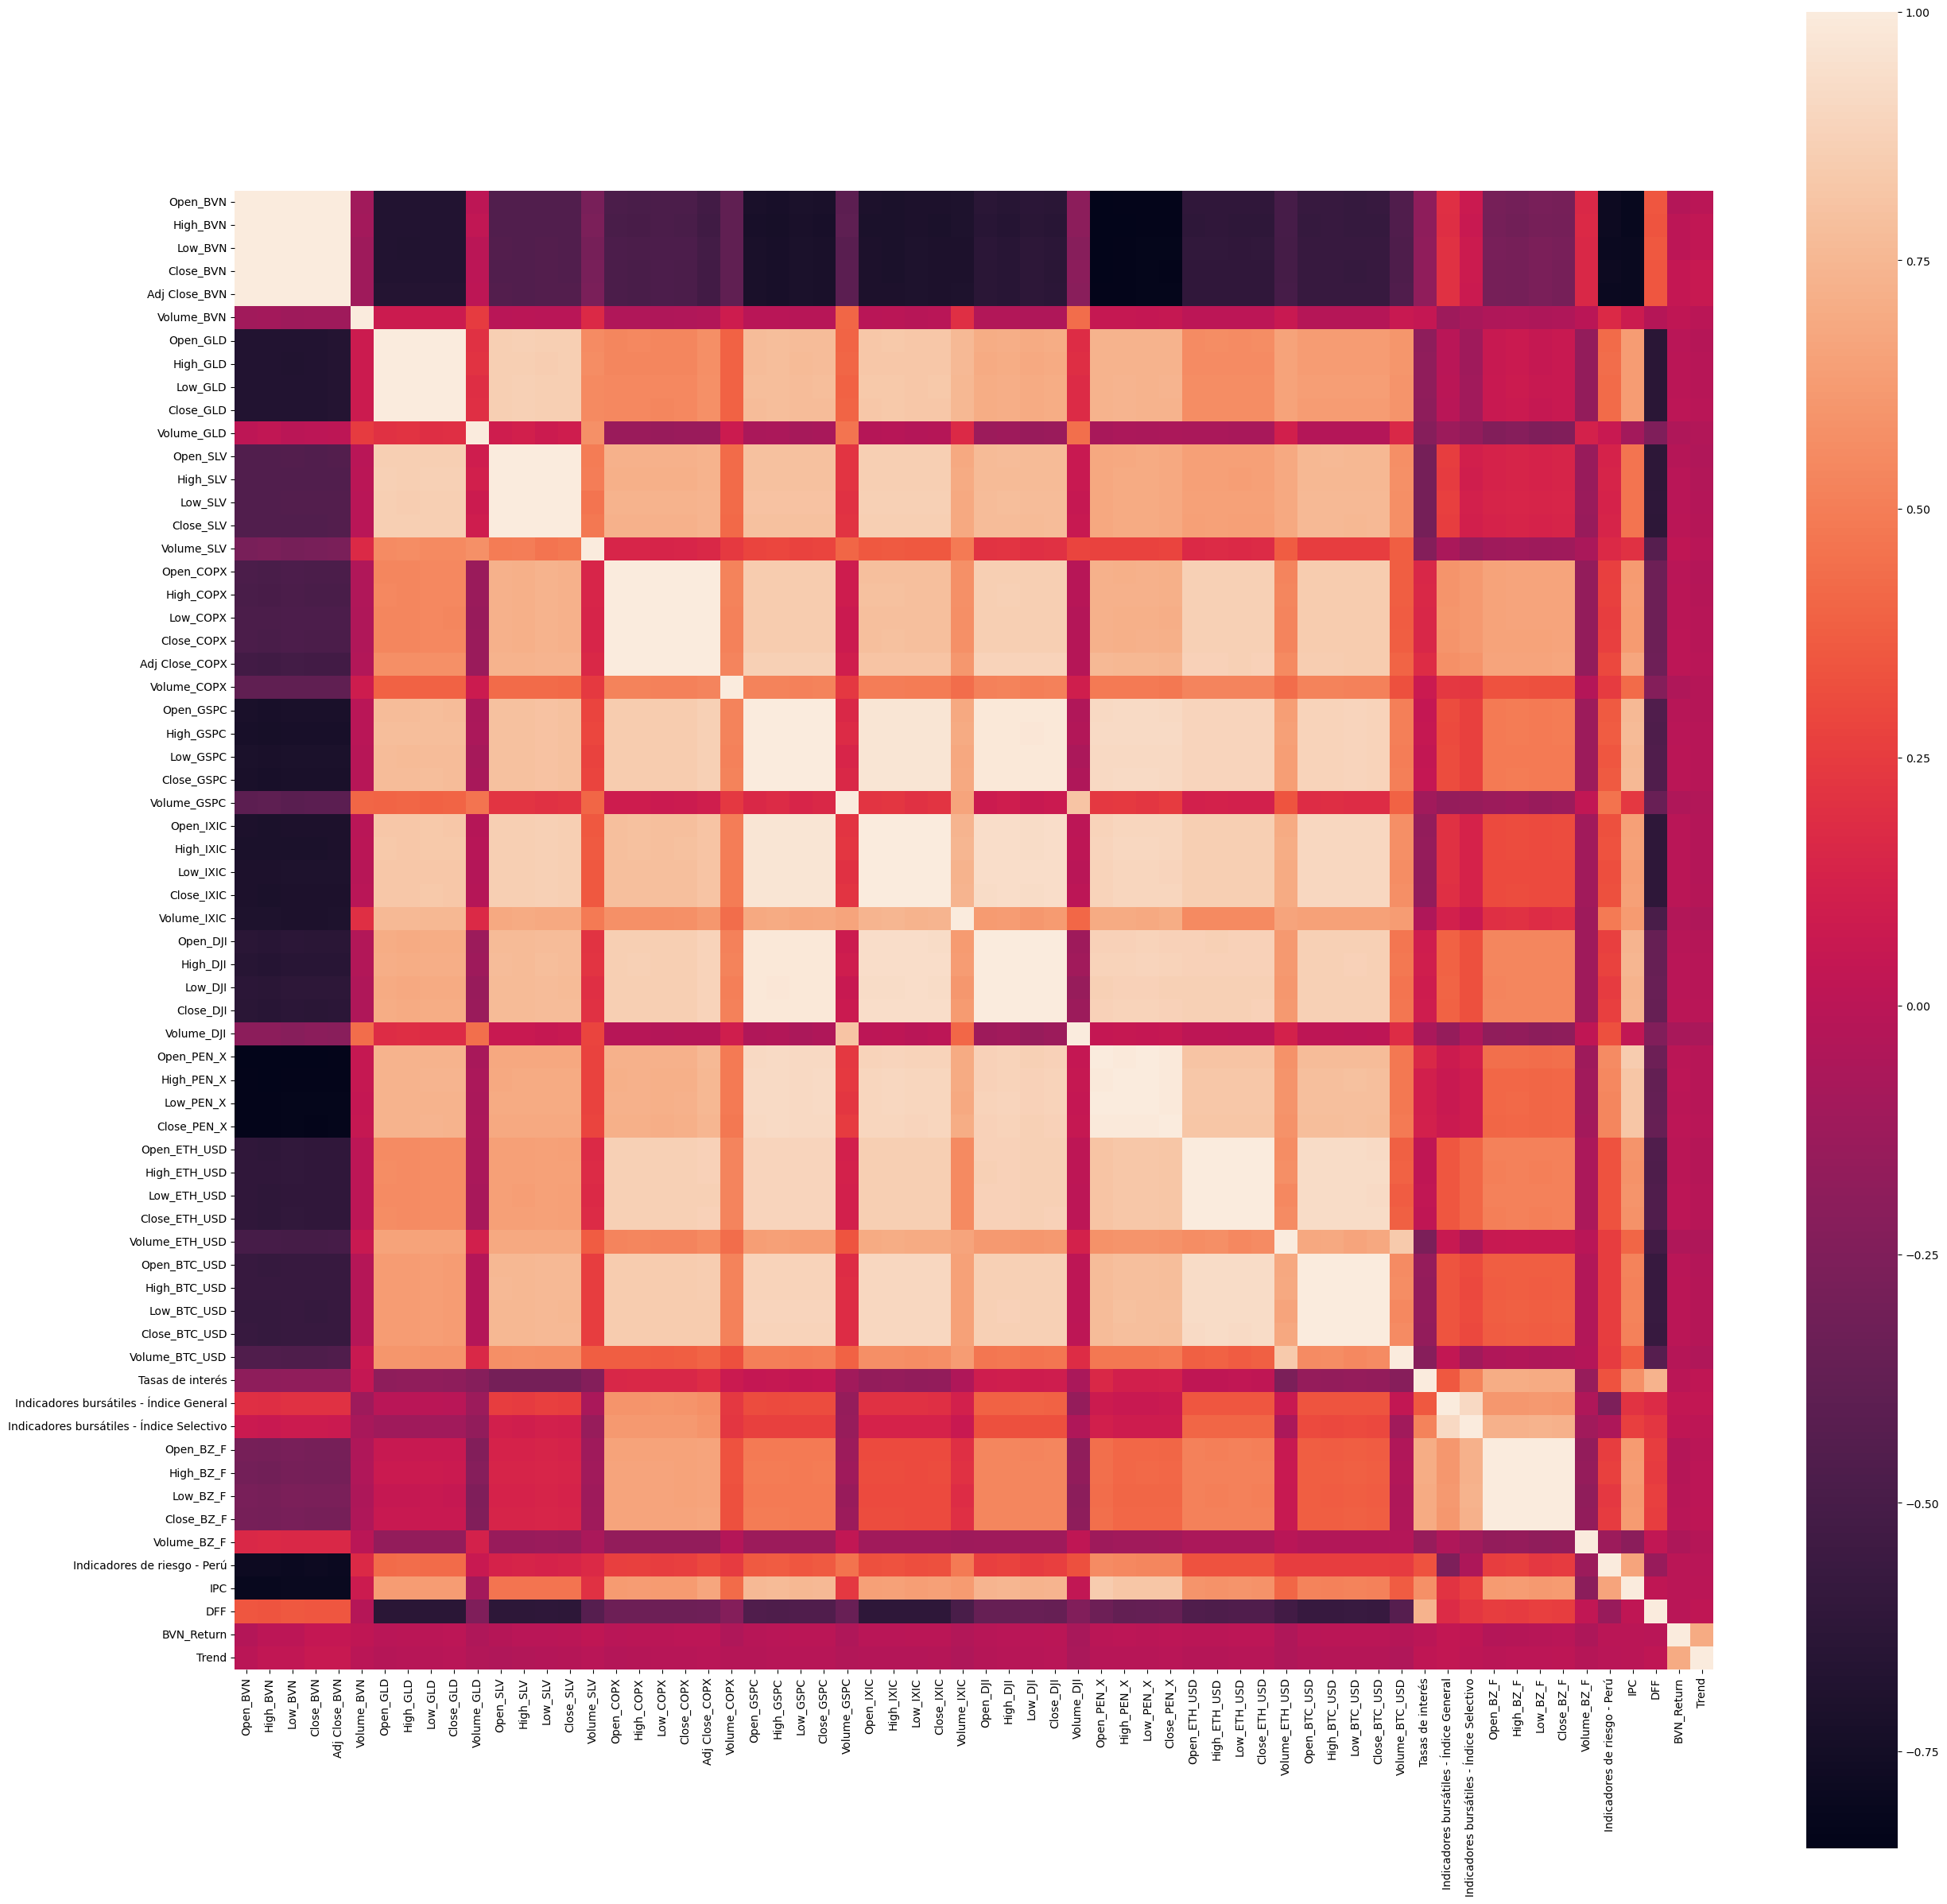

In [59]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corrmat, vmax=1, square=True);

In [61]:
corr = df.corr()
corr[['Trend']].sort_values(by = 'Trend',ascending = False).style.background_gradient()

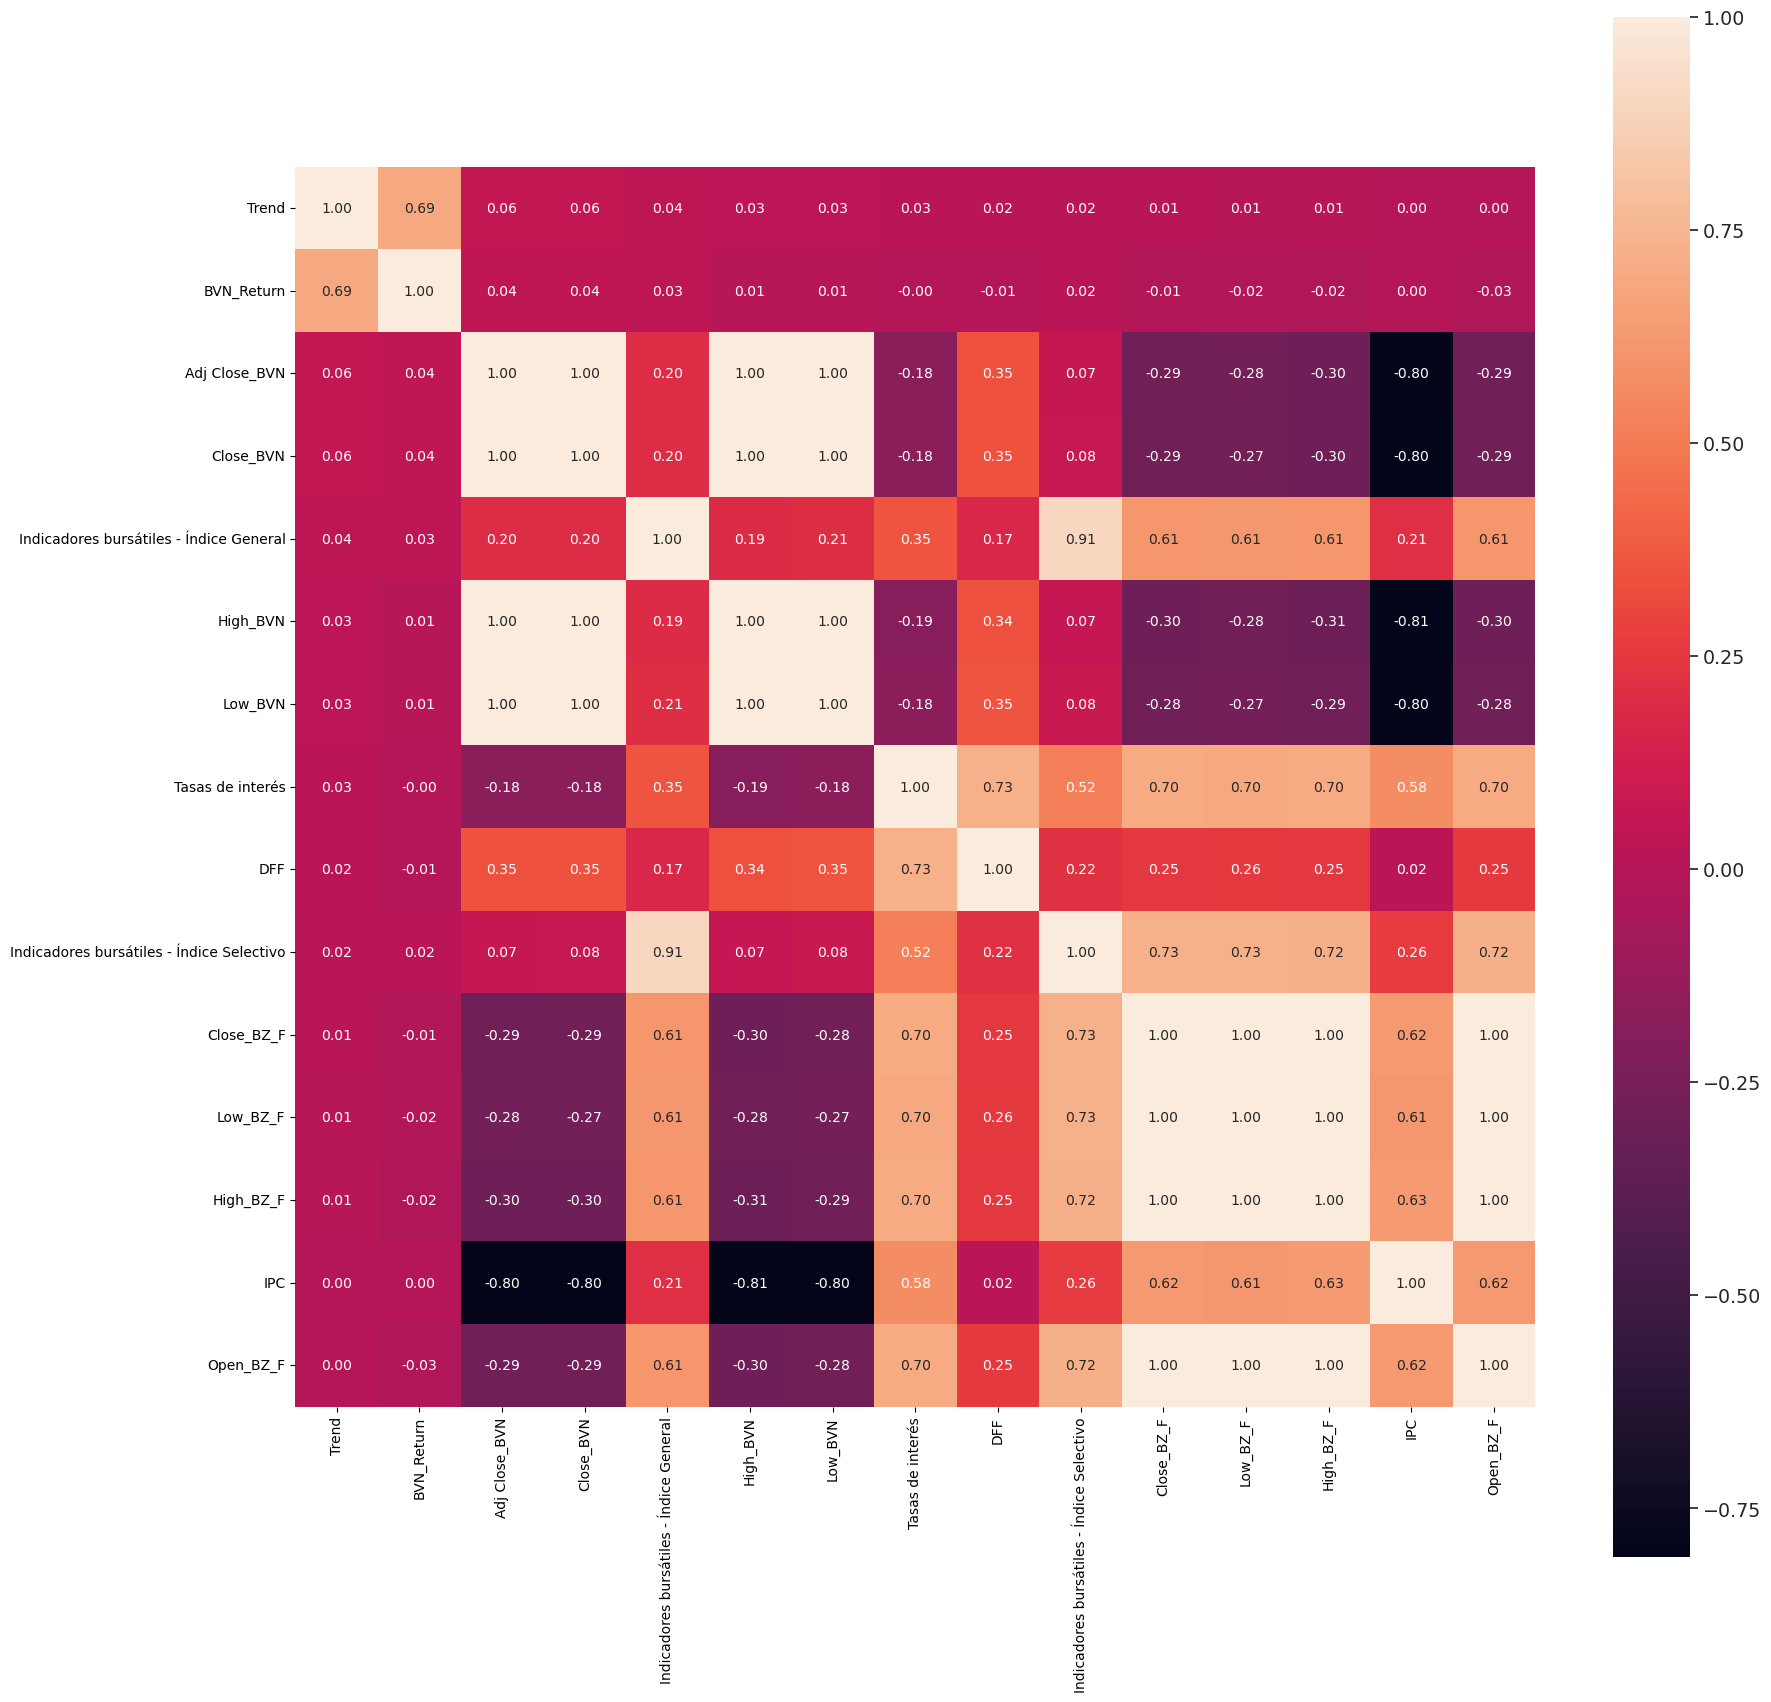

In [62]:
# Matriz de correlación
k = 15 # Número de variables.
cols = corrmat.nlargest(k, 'Trend')['Trend'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(20, 20))
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

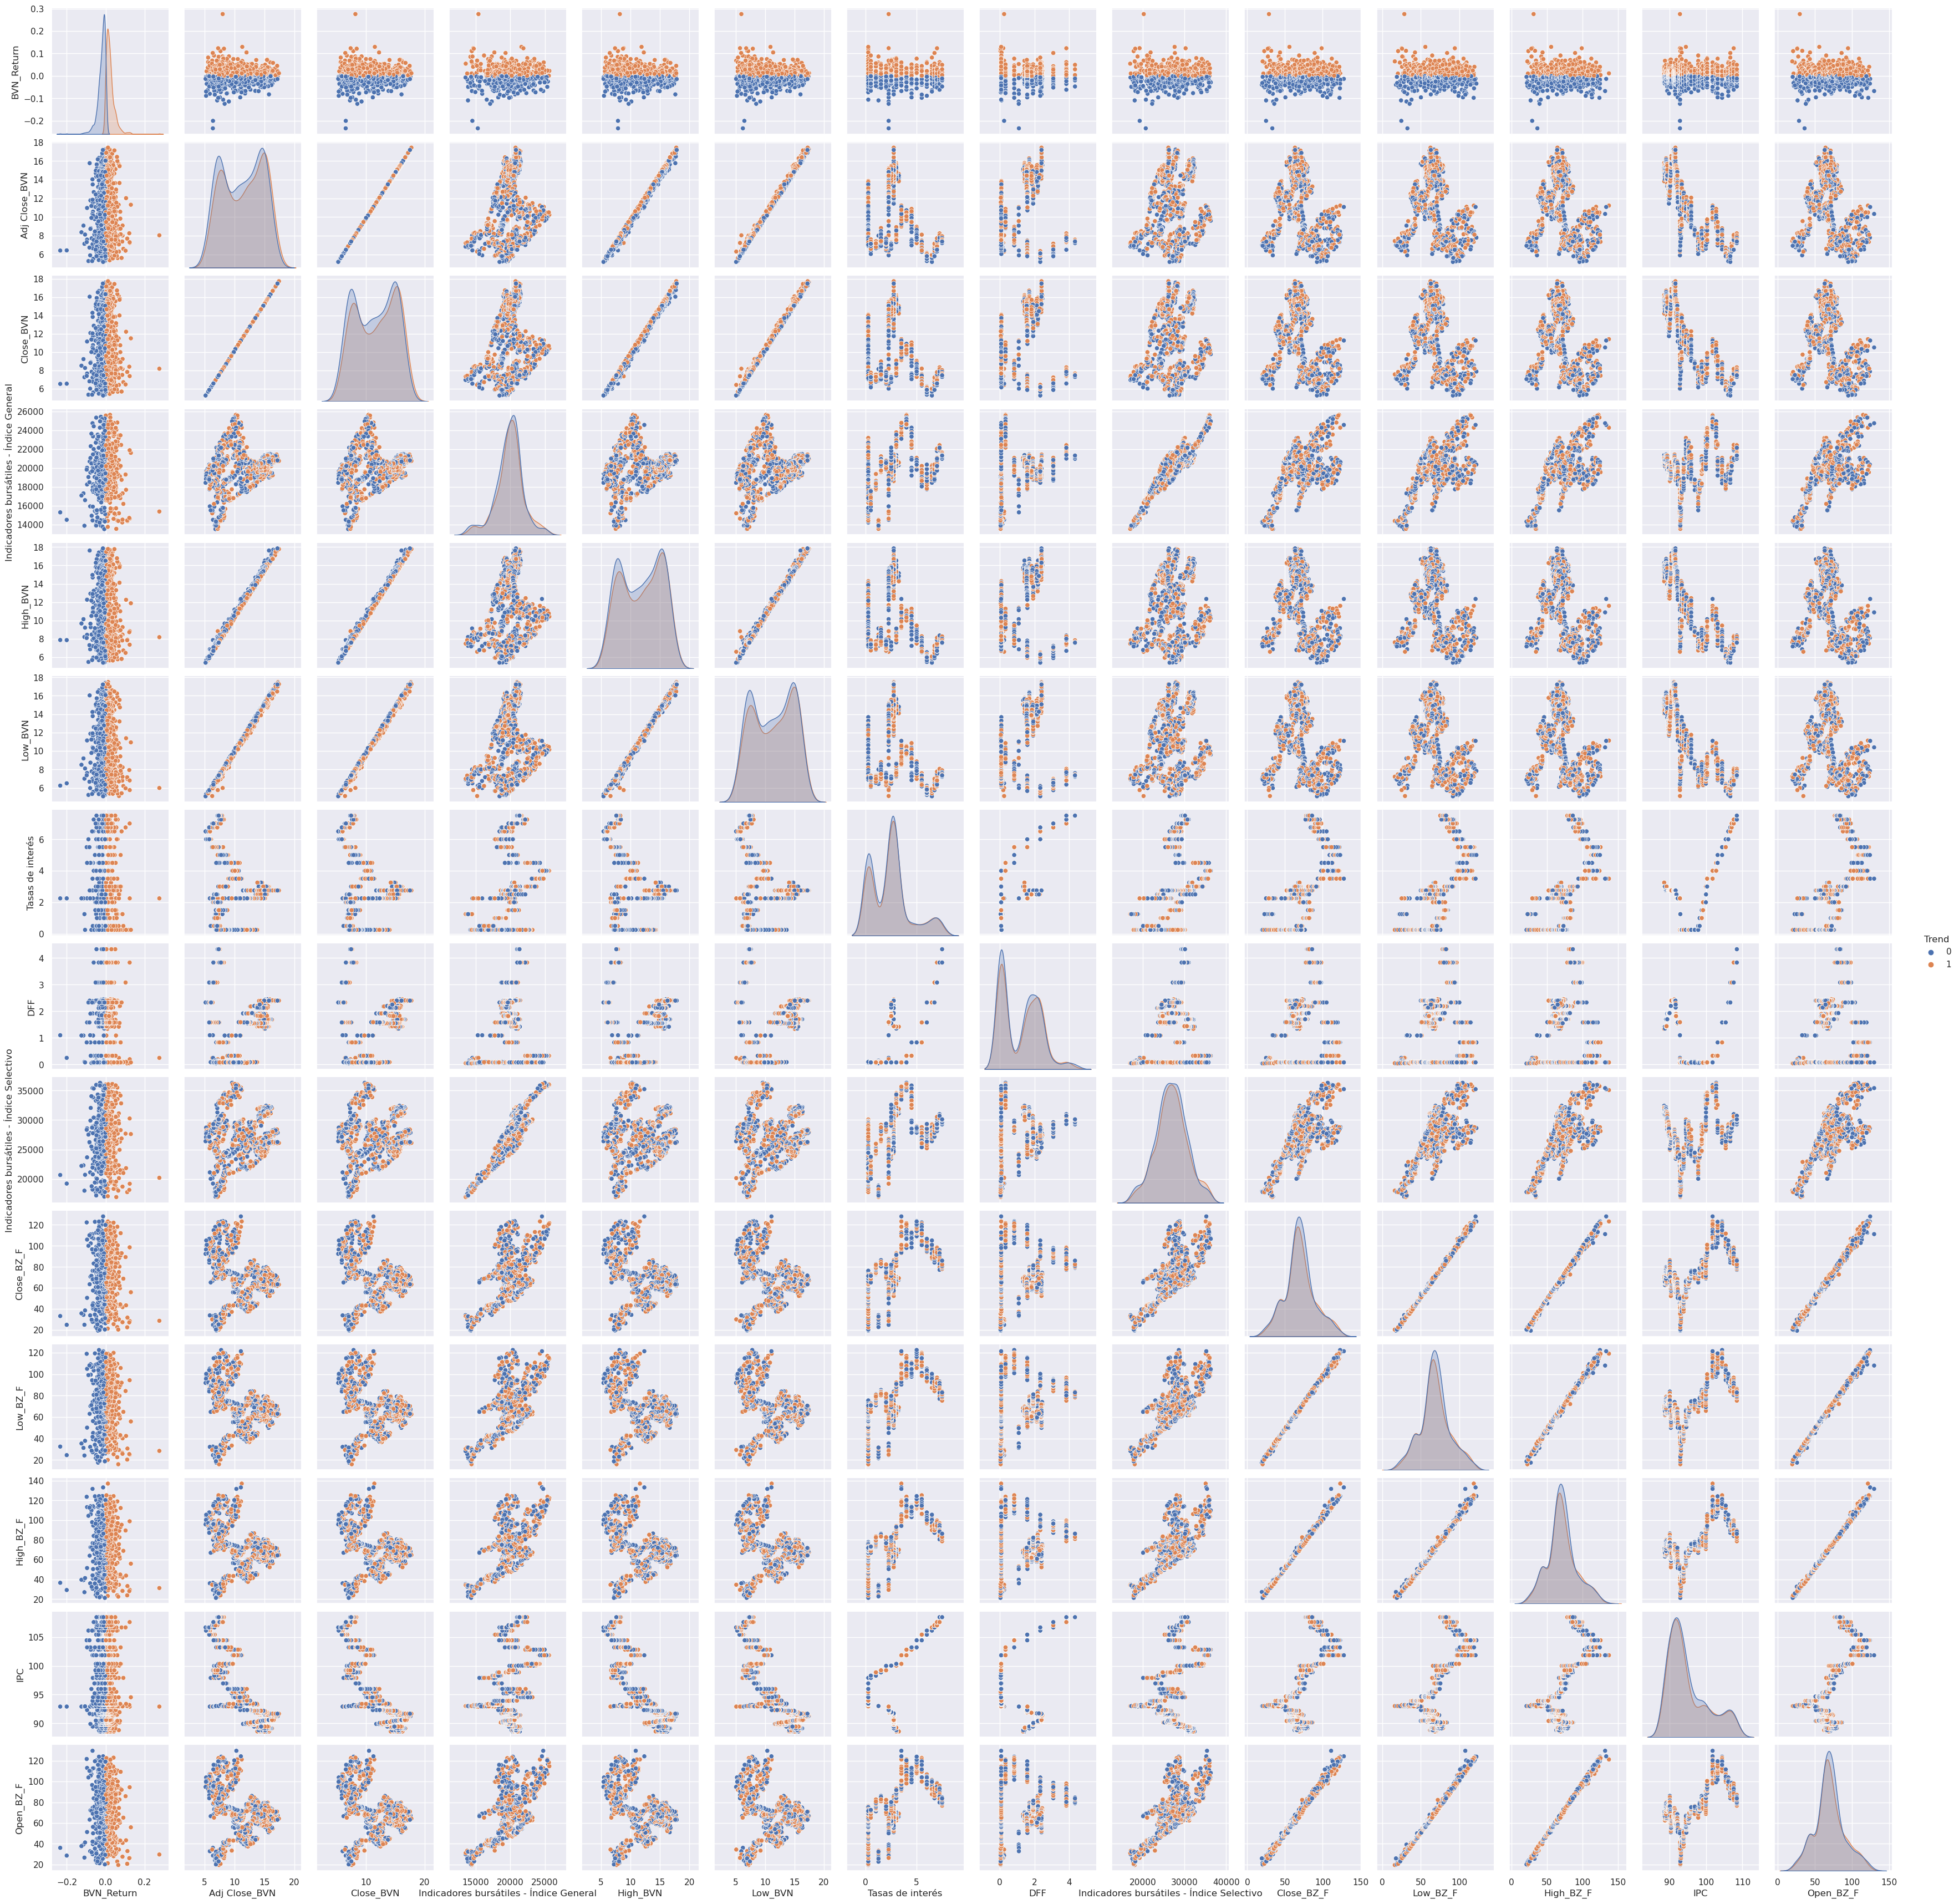

In [63]:
sns.set()
sns.pairplot(df[cols], hue='Trend')
plt.show();

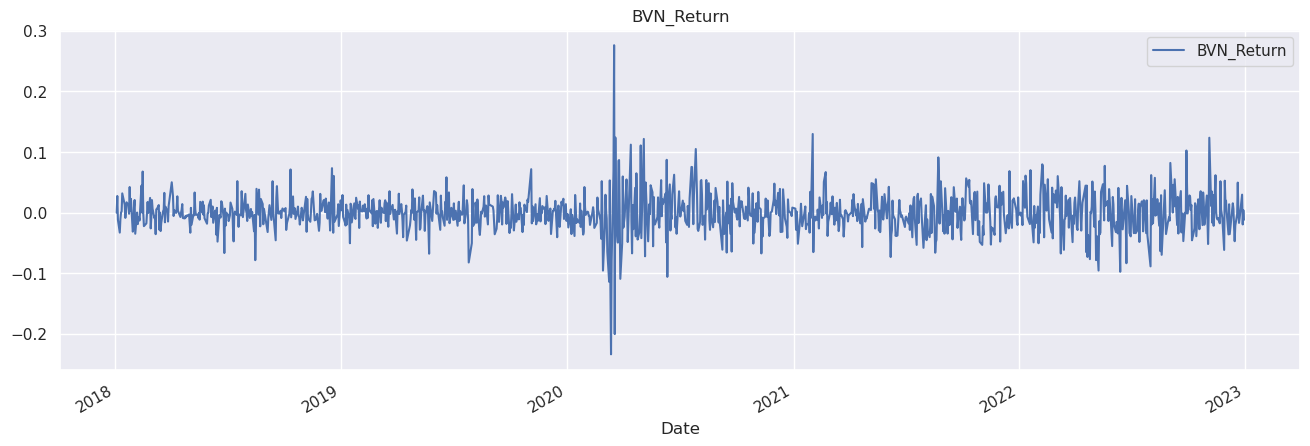

In [65]:
plt.figure(figsize=(16, 5))
plt.title("BVN_Return")
df.BVN_Return.plot()
plt.grid(True);
plt.legend()
plt.show()

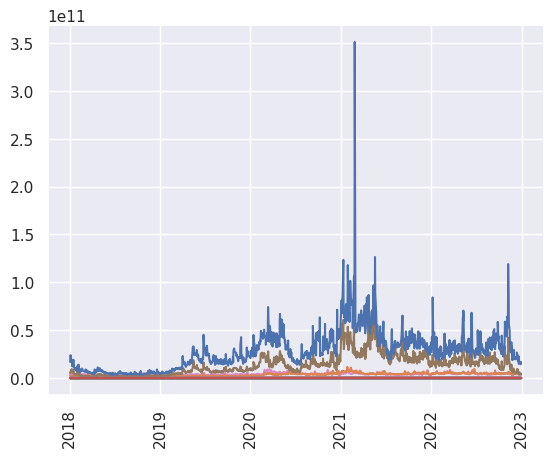

In [66]:
plt.plot(df);
plt.xticks(rotation='vertical');

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage
corr = df.corr()
Z = linkage(corr, 'average')
Z[0]

array([2.70000000e+01, 3.00000000e+01, 1.16246366e-02, 2.00000000e+00])

In [68]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import pylab
c, coph_dists = cophenet(Z, pdist(corr))
c

0.9338521782307887

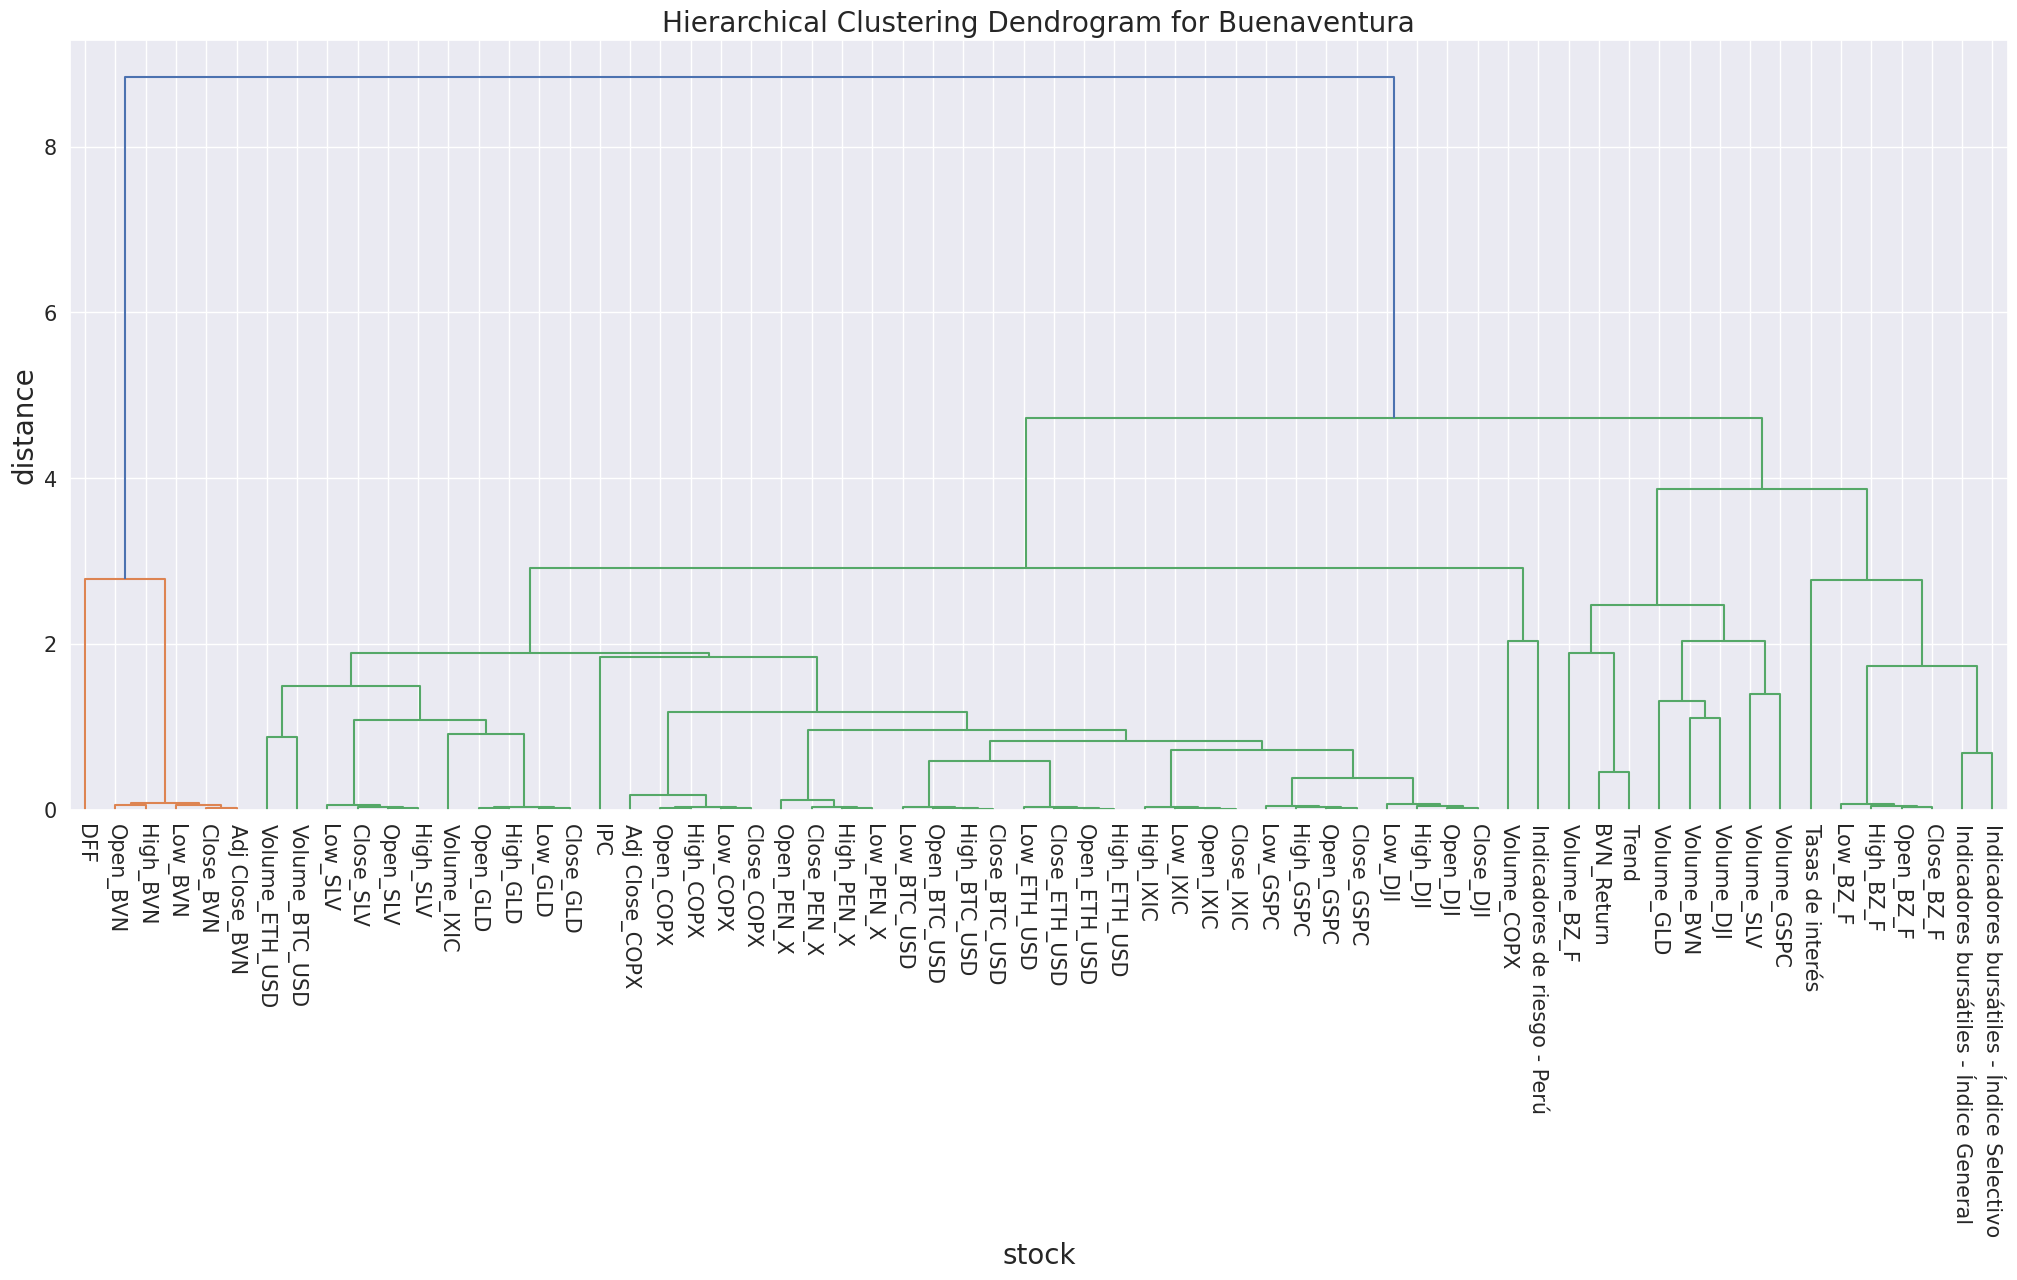

In [69]:
plt.figure(figsize=(25, 10))
labelsize=20
ticksize=15
plt.title('Hierarchical Clustering Dendrogram for '+"Buenaventura", fontsize=labelsize)
plt.xlabel('stock', fontsize=labelsize)
plt.ylabel('distance', fontsize=labelsize)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = corr.columns
)
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)
plt.savefig('dendogram_'+'Buenaventura'+'.png')
plt.show()

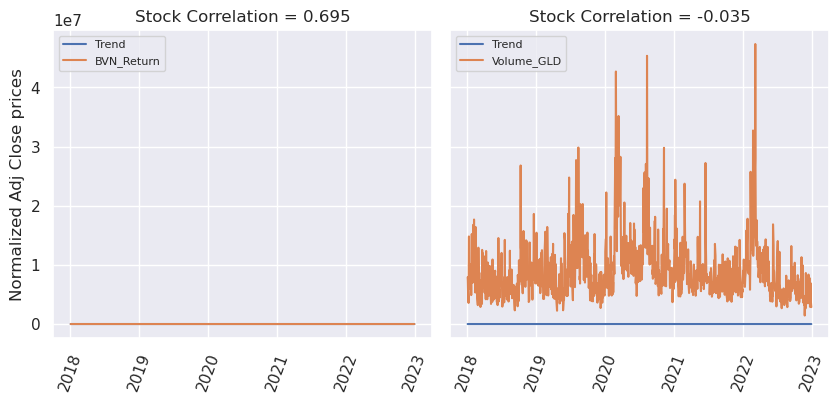

In [70]:
#plot sample correlations
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharey=True)
plt.subplots_adjust(wspace=0.05)

#high correlation
sA = "Trend"
sB = "BVN_Return"
ax1.plot(df[sA],label=sA)
ax1.plot(df[sB],label=sB)
ax1.set_title('Stock Correlation = %.3f'%corr[sA][sB])
ax1.set_ylabel('Normalized Adj Close prices')
ax1.legend(loc='upper left',prop={'size':8})
plt.setp(ax1.get_xticklabels(), rotation=70);

#low correlation
sA = "Trend"
sB = "Volume_GLD"
ax2.plot(df[sA],label=sA)
ax2.plot(df[sB],label=sB)
ax2.set_title('Stock Correlation = %.3f'%corr[sA][sB])
ax2.legend(loc='upper left',prop={'size':8})
plt.setp(ax2.get_xticklabels(), rotation=70);

### Procesamiento - Paso 1



In [71]:
df02 = df.copy()

In [72]:
df02.sample(10)

Open_BVN   High_BVN    Low_BVN  Close_BVN  Adj Close_BVN  \
Date                                                                   
2019-12-10     14.80  14.990000  14.790000  14.810000      14.574048   
2021-08-25      7.07   7.140000   6.870000   7.030000       6.917999   
2018-04-06     15.95  16.100000  15.870000  15.940000      15.505358   
2018-12-07     14.88  15.190000  14.850000  15.060000      14.739462   
2018-04-20     16.60  16.700001  16.379999  16.559999      16.137974   
2020-01-07     14.47  14.800000  14.420000  14.670000      14.436278   
2022-06-02      8.94   9.450000   8.870000   8.880000       8.798048   
2018-03-05     15.99  16.020000  15.690000  15.820000      15.388631   
2020-01-08     14.65  14.650000  14.120000  14.150000      13.924562   
2018-11-16     14.48  14.950000  14.230000  14.830000      14.514355   

            Volume_BVN    Open_GLD    High_GLD     Low_GLD   Close_GLD  ...  \
Date                                                                    ...   
2019-12-10      502100  138.250000  138.330002  137.740005  137.970001  ...   
2021-08-25      982800  167.880005  167.919998  166.740005  167.479996  ...   
2018-04-06      695700  126.570000  126.599998  126.129997  126.389999  ...   
2018-12-07     1555500  117.620003  118.230003  117.540001  118.089996  ...   
2018-04-20      860300  126.690002  126.970001  126.550003  126.629997  ...   
2020-01-07      573600  147.570007  148.139999  147.429993  147.970001  ...   
2022-06-02     2251200  173.660004  174.449997  173.490005  174.350006  ...   
2018-03-05      739500  125.349998  125.480003  124.959999  125.180000  ...   
2020-01-08     1178900  148.490005  148.610001  146.139999  146.860001  ...   
2018-11-16     2041300  115.830002  115.879997  115.370003  115.620003  ...   

             Open_BZ_F   High_BZ_F    Low_BZ_F  Close_BZ_F  Volume_BZ_F  \
Date                                                                      
2019-12-10   64.000000   64.680000   63.770000   64.339996        31170   
2021-08-25   71.129997   72.410004   70.510002   72.250000        32345   
2018-04-06   68.589996   68.620003   66.860001   67.110001        30749   
2018-12-07   60.310001   63.709999   59.099998   61.669998        59861   
2018-04-20   74.000000   74.199997   72.830002   74.059998        32478   
2020-01-07   68.580002   68.739998   67.650002   68.269997        41178   
2022-06-02  115.820000  118.440002  112.480003  117.610001        22117   
2018-03-05   64.690002   65.870003   64.099998   65.540001        31209   
2020-01-08   68.470001   71.989998   64.940002   65.440002        85232   
2018-11-16   66.750000   68.379997   66.099998   66.760002        37139   

            Indicadores de riesgo - Perú         IPC   DFF  BVN_Return  Trend  
Date                                                                           
2019-12-10                    115.909091   92.139993  1.55    0.002708      1  
2021-08-25                    183.000000   97.903369  0.09   -0.018156      0  
2018-04-06                    145.238095   89.126640  1.69    0.003778      1  
2018-12-07                    164.809524   90.421894  2.19    0.023098      1  
2018-04-20                    145.238095   89.126640  1.70   -0.008977      0  
2020-01-07                    113.869565   92.189571  1.55    0.005483      1  
2022-06-02                    213.545455  104.439931  0.83    0.013699      1  
2018-03-05                    147.045455   89.248976  1.42   -0.009393      0  
2020-01-08                    113.869565   92.189571  1.55   -0.035447      0  
2018-11-16                    156.863636   90.257826  2.20    0.034892      1  

[10 rows x 64 columns]

In [73]:
# Count the number of occurrences of Trend values
trend_counts = df02['Trend'].value_counts()

# Access the count for Trend = 0 and Trend = 1
trend_0_count = trend_counts.get(0, 0)
trend_1_count = trend_counts.get(1, 0)

# Print the counts
print("Count of Trend = 0:", trend_0_count)
print("Count of Trend = 1:", trend_1_count)

Count of Trend = 0: 629
Count of Trend = 1: 583


### Tratamiento de Missing Values

In [74]:
df03 = df02.dropna()  # Eliminar filas con valores nulos

In [75]:
df03

Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN  \
Date                                                                            
2018-01-03     14.53     14.89    14.35      14.62      14.221352     1606700   
2018-01-04     14.66     15.12    14.56      15.02      14.610446     1845400   
2018-01-05     14.95     15.15    14.81      14.84      14.435353     1037400   
2018-01-08     14.83     14.84    14.28      14.35      13.958715     1286100   
2018-01-09     14.28     14.32    14.10      14.19      13.803077      948100   
...              ...       ...      ...        ...            ...         ...   
2022-12-23      7.55      7.59     7.36       7.44       7.371337      447000   
2022-12-27      7.51      7.85     7.44       7.66       7.589307      624400   
2022-12-28      7.61      7.64     7.34       7.51       7.440692      911700   
2022-12-29      7.59      7.66     7.44       7.54       7.470415      631700   
2022-12-30      7.54      7.59     7.36       7.45       7.381245      356200   

              Open_GLD    High_GLD     Low_GLD   Close_GLD  ...  Open_BZ_F  \
Date                                                        ...              
2018-01-03  125.050003  125.089996  124.099998  124.820000  ...  66.489998   
2018-01-04  124.889999  125.849998  124.739998  125.459999  ...  68.000000   
2018-01-05  124.930000  125.480003  124.830002  125.330002  ...  68.059998   
2018-01-08  125.199997  125.320000  124.900002  125.309998  ...  67.820000   
2018-01-09  124.489998  124.860001  124.230003  124.730003  ...  67.930000   
...                ...         ...         ...         ...  ...        ...   
2022-12-23  166.880005  167.800003  166.660004  167.259995  ...  81.730003   
2022-12-27  167.889999  170.610001  167.800003  168.669998  ...  84.459999   
2022-12-28  168.050003  168.339996  167.100006  167.910004  ...  84.599998   
2022-12-29  168.539993  169.350006  168.520004  168.850006  ...  82.860001   
2022-12-30  169.259995  169.899994  168.800003  169.639999  ...  83.660004   

            High_BZ_F   Low_BZ_F  Close_BZ_F  Volume_BZ_F  \
Date                                                        
2018-01-03  68.010002  66.400002   67.839996        25878   
2018-01-04  68.260002  67.529999   68.070000        22840   
2018-01-05  68.089996  67.269997   67.620003        18290   
2018-01-08  67.980003  67.449997   67.779999        17704   
2018-01-09  69.199997  67.690002   68.820000        25548   
...               ...        ...         ...          ...   
2022-12-23  84.370003  81.339996   83.919998         8621   
2022-12-27  85.669998  83.660004   84.330002         7512   
2022-12-28  84.639999  81.949997   83.260002         5384   
2022-12-29  82.910004  81.300003   82.260002        20599   
2022-12-30  86.279999  82.879997   85.910004        19375   

            Indicadores de riesgo - Perú         IPC   DFF  BVN_Return  Trend  
Date                                                                           
2018-01-03                    116.608696   88.594649  1.42    0.000000      0  
2018-01-04                    116.608696   88.594649  1.42    0.027360      1  
2018-01-05                    116.608696   88.594649  1.42   -0.011984      0  
2018-01-08                    116.608696   88.594649  1.42   -0.033019      0  
2018-01-09                    116.608696   88.594649  1.42   -0.011150      0  
...                                  ...         ...   ...         ...    ...  
2022-12-23                    195.500000  108.459162  4.33   -0.009321      0  
2022-12-27                    195.500000  108.459162  4.33    0.029570      1  
2022-12-28                    195.500000  108.459162  4.33   -0.019582      0  
2022-12-29                    195.500000  108.459162  4.33    0.003995      1  
2022-12-30                    195.500000  108.459162  4.33   -0.011936      0  

[1212 rows x 64 columns]

### Particionamiento en Entrenamiento y Test

In [76]:
# Dividir los datos en conjunto de entrenamiento y prueba
train_size = int(len(df03) * 0.8)
train_data = df03[:train_size]
test_data = df03[train_size:]

In [77]:
print(df03.shape)
print(train_size)
print(train_data.shape)
print(test_data.shape)

(1212, 64)
969
(969, 64)
(243, 64)


### Normalizamos la data en Escala de 0 y 1

In [78]:
df03.head()

Open_BVN  High_BVN  Low_BVN  Close_BVN  Adj Close_BVN  Volume_BVN  \
Date                                                                            
2018-01-03     14.53     14.89    14.35      14.62      14.221352     1606700   
2018-01-04     14.66     15.12    14.56      15.02      14.610446     1845400   
2018-01-05     14.95     15.15    14.81      14.84      14.435353     1037400   
2018-01-08     14.83     14.84    14.28      14.35      13.958715     1286100   
2018-01-09     14.28     14.32    14.10      14.19      13.803077      948100   

              Open_GLD    High_GLD     Low_GLD   Close_GLD  ...  Open_BZ_F  \
Date                                                        ...              
2018-01-03  125.050003  125.089996  124.099998  124.820000  ...  66.489998   
2018-01-04  124.889999  125.849998  124.739998  125.459999  ...  68.000000   
2018-01-05  124.930000  125.480003  124.830002  125.330002  ...  68.059998   
2018-01-08  125.199997  125.320000  124.900002  125.309998  ...  67.820000   
2018-01-09  124.489998  124.860001  124.230003  124.730003  ...  67.930000   

            High_BZ_F   Low_BZ_F  Close_BZ_F  Volume_BZ_F  \
Date                                                        
2018-01-03  68.010002  66.400002   67.839996        25878   
2018-01-04  68.260002  67.529999   68.070000        22840   
2018-01-05  68.089996  67.269997   67.620003        18290   
2018-01-08  67.980003  67.449997   67.779999        17704   
2018-01-09  69.199997  67.690002   68.820000        25548   

            Indicadores de riesgo - Perú        IPC   DFF  BVN_Return  Trend  
Date                                                                          
2018-01-03                    116.608696  88.594649  1.42    0.000000      0  
2018-01-04                    116.608696  88.594649  1.42    0.027360      1  
2018-01-05                    116.608696  88.594649  1.42   -0.011984      0  
2018-01-08                    116.608696  88.594649  1.42   -0.033019      0  
2018-01-09                    116.608696  88.594649  1.42   -0.011150      0  

[5 rows x 64 columns]

In [79]:
from sklearn.preprocessing import MinMaxScaler
# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))

In [80]:
scaled_train_data = scaler.fit_transform(train_data.drop(['BVN_Return'], axis=1))

In [81]:
scaled_test_data = scaler.transform(test_data.drop(['BVN_Return'], axis=1))

In [82]:
print(type(scaled_train_data))
print(len(scaled_train_data))
print(scaled_train_data.shape)
scaled_train_data

<class 'numpy.ndarray'>
969
(969, 63)


array([[0.75400637, 0.7368889 , 0.74616011, ..., 0.        , 0.57261411,
        0.        ],
       [0.76442304, 0.7573333 , 0.76313667, ..., 0.        , 0.57261411,
        1.        ],
       [0.78766022, 0.75999994, 0.78334686, ..., 0.        , 0.57261411,
        0.        ],
       ...,
       [0.16586539, 0.06222225, 0.15844786, ..., 1.        , 0.01659751,
        0.        ],
       [0.16506409, 0.07022222, 0.16653193, ..., 1.        , 0.01659751,
        1.        ],
       [0.18349358, 0.07466668, 0.17299922, ..., 1.        , 0.01244813,
        0.        ]])

In [83]:
# Crear secuencias de tiempo para el modelo LSTM
window_size = 100

def create_sequences(data):
    x = []
    y = []
    for i in range( window_size , len(data) ):

        x.append( data[i-window_size:i] )
        print("interacion: ", i-window_size +1 )
        print("indicador: ", i)
        print("posicion inicial tomada: ", i-window_size)
        print("posicion final tomada: ", i-1)

        print(data[i])
        # print(data[i-window_size:i])

        y.append( data[i][-1] )
        print("y[",i,"]: ", data[i][-1])


    return np.array(x), np.array(y)

In [84]:
x_train, y_train = create_sequences(scaled_train_data)

interacion:  1
indicador:  100
posicion inicial tomada:  0
posicion final tomada:  99
[0.8501602  0.83466662 0.8536783  0.85008516 0.83917438 0.02189741
 0.13842973 0.13382588 0.1388412  0.1361276  0.04859167 0.25517659
 0.24909316 0.29153405 0.26852437 0.00353993 0.4449117  0.44009848
 0.46286848 0.46942243 0.43257144 0.00757666 0.18003973 0.17878554
 0.21199451 0.19934975 0.24349798 0.13304392 0.10890263 0.1373942
 0.13095545 0.11191082 0.32577752 0.32681503 0.35795273 0.34764845
 0.30638436 0.09540966 0.06647911 0.09842791 0.08388821 0.11303493
 0.11161982 0.10799154 0.10759316 0.01121134 0.06951232 0.06758722
 0.06754986 0.0664132  0.00506882 0.83333333 0.78557773 0.91305895
 0.85699269 0.85042016 0.85253449 0.83435216 0.36153068 0.30145214
 0.07419587 0.68879668 1.        ]
y[ 100 ]:  1.0
interacion:  2
indicador:  101
posicion inicial tomada:  1
posicion final tomada:  100
[0.86778842 0.84444445 0.86499595 0.8398637  0.82902424 0.04139251
 0.1347837  0.1374592  0.13773632 0.14192

[0.20272437 0.0968889  0.19320941 0.13117547 0.13153637 0.04707781
 0.75984433 0.7556014  0.76945744 0.76120299 0.08604054 0.72350786
 0.72188631 0.78357736 0.76884106 0.07287096 0.72525934 0.73522975
 0.75453516 0.77689691 0.78234548 0.12636236 0.94566386 0.94243666
 0.94910324 0.94373664 0.30303491 0.96260391 0.95400083 0.96720754
 0.96368328 0.33871963 0.97235076 0.96746466 0.97355035 0.96829592
 0.22193435 0.87409553 0.82236619 0.88718353 0.87873949 0.96304145
 0.97634632 0.97043056 0.9827185  0.20314831 0.96001587 0.95095316
 0.96515147 0.95931762 0.09389293 0.41666667 0.73770636 0.76291068
 0.94757401 0.94973261 0.94556454 0.94736844 0.35601306 0.39914727
 0.93189561 0.01659751 1.        ]
y[ 935 ]:  1.0
interacion:  837
indicador:  936
posicion inicial tomada:  836
posicion final tomada:  935
[0.18990383 0.11822221 0.17784966 0.16098807 0.161431   0.10338213
 0.75413212 0.7604457  0.76528347 0.76518901 0.1309365  0.72107187
 0.7291415  0.78103116 0.77327423 0.07674662 0.75637794

In [85]:
x_train.shape

(869, 100, 63)

In [86]:
y_train.shape

(869,)

In [87]:
x_test, y_test = create_sequences(scaled_test_data)

interacion:  1
indicador:  100
posicion inicial tomada:  0
posicion final tomada:  99
[0.30288458 0.2248889  0.29749396 0.25894378 0.26491573 0.05584784
 0.75388918 0.74651819 0.7559538  0.74586311 0.03704984 0.56516447
 0.55683193 0.60280078 0.57948072 0.06909473 0.81244747 0.80278996
 0.83985257 0.8499434  0.86720873 0.05173144 0.71332403 0.74067463
 0.7285312  0.75160241 0.35473428 0.56897459 0.57743639 0.57559354
 0.59624344 0.35967583 0.78350495 0.80261219 0.79572813 0.81696804
 0.29236961 0.54919715 0.49086569 0.48929819 0.52291008 0.36344438
 0.35955669 0.35342061 0.34701591 0.29340139 0.40434507 0.39745432
 0.39762349 0.39464203 0.09590989 1.58333333 0.75780699 0.77539273
 1.47183423 1.5043545  1.44988475 1.49247052 0.04819873 0.63184265
 1.28154082 0.32780083 1.        ]
y[ 100 ]:  1.0
interacion:  2
indicador:  101
posicion inicial tomada:  1
posicion final tomada:  100
[0.31730768 0.22844445 0.2724333  0.21635435 0.22191817 0.15454986
 0.74440937 0.74106831 0.73680333 0.7252

In [88]:
x_test.shape

(143, 100, 63)

In [89]:
y_test.shape

(143,)

In [90]:
x_train.shape[1]

100

In [91]:
x_train.shape[2]

63

### Modelo LSTM

In [94]:
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(units=160, return_sequences=True,
               input_shape=(x_train.shape[1], x_train.shape[2])))
# model.add(Dropout(0.2))
model.add(LSTM(units=160))
# model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 5.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 34.3 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 22.6 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 26.0 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.7 MB/s eta 0:00:00 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 M

2023-06-27 18:14:01.909144: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-27 18:14:01.937637: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-27 18:14:01.938330: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-27 18:14:03.093860: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 160)          143360    
                                                                 
 lstm_1 (LSTM)               (None, 160)               205440    
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 348,961
Trainable params: 348,961
Non-trainable params: 0
_________________________________________________________________


2023-06-27 18:14:03.817434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-27 18:14:03.818363: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-27 18:14:03.819051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [96]:
# Compilar el modelo
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [100]:
# Entrenar el modelo
model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1)

Epoch 1/100


2023-06-27 18:14:53.619555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-27 18:14:53.620619: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-27 18:14:53.621451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

14/14 [==============================] - ETA: 0s - loss: 0.7023 - accuracy: 0.5121

2023-06-27 18:14:56.860801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-27 18:14:56.861748: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-27 18:14:56.862440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

14/14 [==============================] - 4s 132ms/step - loss: 0.7023 - accuracy: 0.5121 - val_loss: 0.7051 - val_accuracy: 0.5175
Epoch 2/100
14/14 [==============================] - 1s 103ms/step - loss: 0.6980 - accuracy: 0.5063 - val_loss: 0.6916 - val_accuracy: 0.5175
Epoch 3/100
14/14 [==============================] - 1s 104ms/step - loss: 0.6912 - accuracy: 0.5190 - val_loss: 0.6915 - val_accuracy: 0.5175
Epoch 4/100
14/14 [==============================] - 1s 105ms/step - loss: 0.6918 - accuracy: 0.5351 - val_loss: 0.6909 - val_accuracy: 0.5175
Epoch 5/100
14/14 [==============================] - 1s 98ms/step - loss: 0.6901 - accuracy: 0.5362 - val_loss: 0.6907 - val_accuracy: 0.5175
Epoch 6/100
14/14 [==============================] - 1s 98ms/step - loss: 0.6904 - accuracy: 0.5374 - val_loss: 0.6901 - val_accuracy: 0.6084
Epoch 7/100
14/14 [==============================] - 1s 103ms/step - loss: 0.6921 - accuracy: 0.5075 - val_loss: 0.6893 - val_accuracy: 0.5664
Epoch 8/100
1

In [101]:
# Evaluar el modelo en el conjunto de ENTRENAMIENTO
loss_train, accuracy_train = model.evaluate(x_train, y_train)
print('Loss:', loss_train)
print('Accuracy:', accuracy_train)

28/28 [==============================] - 1s 26ms/step - loss: 0.4074 - accuracy: 0.8113
Loss: 0.4074299931526184
Accuracy: 0.8112773299217224


In [102]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

5/5 [==============================] - 0s 23ms/step - loss: 1.4239 - accuracy: 0.4895
Loss: 1.4239013195037842
Accuracy: 0.4895104765892029


In [103]:
# Predecir la tendencia para el periodo de TRAINING, evaluar el aprendizaje
train_predict = model.predict(x_train)
train_predict

2023-06-27 18:21:33.487795: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-27 18:21:33.488826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-27 18:21:33.489532: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

28/28 [==============================] - 1s 26ms/step


array([[0.83411974],
       [0.5080033 ],
       [0.9583073 ],
       [0.8518781 ],
       [0.2955697 ],
       [0.706266  ],
       [0.41487992],
       [0.08785714],
       [0.17026208],
       [0.04717897],
       [0.05479983],
       [0.16790326],
       [0.59347457],
       [0.90452373],
       [0.6729572 ],
       [0.21909013],
       [0.38180476],
       [0.5346578 ],
       [0.15693186],
       [0.13205007],
       [0.19766833],
       [0.39147922],
       [0.6695145 ],
       [0.8566624 ],
       [0.58308333],
       [0.18659592],
       [0.23052533],
       [0.36513546],
       [0.55419976],
       [0.24701595],
       [0.27641258],
       [0.08830956],
       [0.12381275],
       [0.35571653],
       [0.77149457],
       [0.9489842 ],
       [0.86053324],
       [0.5711175 ],
       [0.76488155],
       [0.593773  ],
       [0.23494762],
       [0.27438852],
       [0.47228357],
       [0.24621998],
       [0.3271145 ],
       [0.5865043 ],
       [0.34810367],
       [0.416

In [104]:
# Predecir la tendencia para el periodo de TEST, incluido el día siguiente
test_predict = model.predict(x_test)
test_predict

5/5 [==============================] - 0s 23ms/step


array([[0.99625796],
       [0.9665244 ],
       [0.9771198 ],
       [0.94922066],
       [0.61191505],
       [0.71030307],
       [0.91879076],
       [0.94987524],
       [0.9007062 ],
       [0.74524045],
       [0.11828764],
       [0.05366719],
       [0.01597552],
       [0.00561362],
       [0.01970087],
       [0.14397493],
       [0.11928172],
       [0.65684986],
       [0.9823747 ],
       [0.9763641 ],
       [0.9076804 ],
       [0.93617827],
       [0.9773855 ],
       [0.97588444],
       [0.9456326 ],
       [0.9495604 ],
       [0.91481596],
       [0.8687482 ],
       [0.9203405 ],
       [0.8831025 ],
       [0.5338782 ],
       [0.53652304],
       [0.5562608 ],
       [0.5107065 ],
       [0.5877985 ],
       [0.90322554],
       [0.96139854],
       [0.943094  ],
       [0.9597407 ],
       [0.96451855],
       [0.96859944],
       [0.980886  ],
       [0.9714399 ],
       [0.9656678 ],
       [0.9407269 ],
       [0.953128  ],
       [0.9422163 ],
       [0.961